# NFL Draft Combine

## Introdução

A análise abaixo foi realizada utilizando a base retirada do spotify disponibilizada no www.kaggle.com.

A motivação dessa análise é entender os fatores que envolve o nfl combine que antecede o draft com os principais jogadores do futebol americano universitário participam para poder mostrar sua habilidades atléticas e aumentarem suas chances de ser escolhidos pelos time profissionais. Vendo principalmente quais características foram crescendo ao longo dos anos, qual a correlação entre algumas variáveis para as posições dos jogadores, etc.

Dataset: https://www.kaggle.com/datasets/mitchellweg1/nfl-combine-results-dataset-2000-2022?resource=download&select=2021_combine.csv

## Carregando as bibliotecas e as bases

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
combine2000 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2000_combine.csv')
combine2001 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2001_combine.csv')
combine2002 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2002_combine.csv')
combine2003 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2003_combine.csv')
combine2004 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2004_combine.csv')
combine2005 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2005_combine.csv')
combine2006 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2006_combine.csv')
combine2007 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2007_combine.csv')
combine2008 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2008_combine.csv')
combine2009 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2009_combine.csv')
combine2010 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2010_combine.csv')
combine2011 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2011_combine.csv')
combine2012 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2012_combine.csv')
combine2013 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2013_combine.csv')
combine2014 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2014_combine.csv')
combine2015 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2015_combine.csv')
combine2016 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2016_combine.csv')
combine2017 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2017_combine.csv')
combine2018 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2018_combine.csv')
combine2019 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2019_combine.csv')
combine2020 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2020_combine.csv')
combine2021 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2021_combine.csv')
combine2022 = pd.read_csv('/kaggle/input/nfl-combine-results-dataset-2000-2022/2022_combine.csv')

## Realizando o tratamento da base

### Criando uma função que recebe o dataframe completo e cria uma coluna com o ano que é passado também como parâmetro, para facilitar em saber sobre qual ano se refere a informação da base

In [3]:
def add_draft_year_to_df(df, year):
  df['draft_year'] = pd.Series()

  for i in df.index:
    df['draft_year'][i] = year

  return df

Aplicando para todas as bases a função

In [4]:
combine2000 = add_draft_year_to_df(combine2000, 2000)
combine2001 = add_draft_year_to_df(combine2001, 2001)
combine2002 = add_draft_year_to_df(combine2002, 2002)
combine2003 = add_draft_year_to_df(combine2003, 2003)
combine2004 = add_draft_year_to_df(combine2004, 2004)
combine2005 = add_draft_year_to_df(combine2005, 2005)
combine2006 = add_draft_year_to_df(combine2006, 2006)
combine2007 = add_draft_year_to_df(combine2007, 2007)
combine2008 = add_draft_year_to_df(combine2008, 2008)
combine2009 = add_draft_year_to_df(combine2009, 2009)
combine2010 = add_draft_year_to_df(combine2010, 2010)
combine2011 = add_draft_year_to_df(combine2011, 2011)
combine2012 = add_draft_year_to_df(combine2012, 2012)
combine2013 = add_draft_year_to_df(combine2013, 2013)
combine2014 = add_draft_year_to_df(combine2014, 2014)
combine2015 = add_draft_year_to_df(combine2015, 2015)
combine2016 = add_draft_year_to_df(combine2016, 2016)
combine2017 = add_draft_year_to_df(combine2017, 2017)
combine2018 = add_draft_year_to_df(combine2018, 2018)
combine2019 = add_draft_year_to_df(combine2019, 2019)
combine2020 = add_draft_year_to_df(combine2020, 2020)
combine2021 = add_draft_year_to_df(combine2021, 2021)
combine2022 = add_draft_year_to_df(combine2022, 2022)

/tmp/ipykernel_20/578878825.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['draft_year'] = pd.Series()
/tmp/ipykernel_20/578878825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['draft_year'][i] = year
/tmp/ipykernel_20/578878825.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['draft_year'] = pd.Series()
/tmp/ipykernel_20/578878825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Combinando todas as bases em apenas um dataframe

In [5]:
df = combine2000.merge(combine2001, how='outer')
df = df.merge(combine2002, how='outer')
df = df.merge(combine2003, how='outer')
df = df.merge(combine2004, how='outer')
df = df.merge(combine2005, how='outer')
df = df.merge(combine2006, how='outer')
df = df.merge(combine2007, how='outer')
df = df.merge(combine2008, how='outer')
df = df.merge(combine2009, how='outer')
df = df.merge(combine2010, how='outer')
df = df.merge(combine2011, how='outer')
df = df.merge(combine2012, how='outer')
df = df.merge(combine2013, how='outer')
df = df.merge(combine2014, how='outer')
df = df.merge(combine2015, how='outer')
df = df.merge(combine2016, how='outer')
df = df.merge(combine2017, how='outer')
df = df.merge(combine2018, how='outer')
df = df.merge(combine2019, how='outer')
df = df.merge(combine2020, how='outer')
df = df.merge(combine2021, how='outer')
df = df.merge(combine2022, how='outer')
df

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000.0
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000.0
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000.0
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7675,Devonte Wyatt,DT,Georgia,6-3,304.0,4.77,29.0,NaN,111.0,NaN,NaN,2022.0
7676,Jalen Wydermyer,TE,Texas A&M,6-4,255.0,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
7677,Cade York,K,LSU,6-1,206.0,NaN,NaN,12.0,NaN,NaN,NaN,2022.0
7678,Nick Zakelj,OT,Fordham,6-6,316.0,5.13,28.5,27.0,110.0,7.75,4.71,2022.0


Exportando a base em csv e xlsx para poder utilizar a partir disso

In [6]:
#Exportando a base depois de concluída a junção e adição dos anos do draft
df.to_excel("combine_stats_df.xlsx")
df.to_csv("combine_stats_df.csv")

## Visualizando a base

In [7]:
df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000.0
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000.0
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000.0
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000.0


Estatística Descritiva da base

* Player: Nome do jogador.
* Pos: Posição do jogador (note que durante os anos algumas denominações vão mudando).
* School: Universidade pela qual o jogador pertence.
* Ht: Altura do jogador.
* Wt: Peso do jogador.
* 40yd: Tempo realizado no tiro de 40yd.
* Vertical: Altura alcançada no salto vertical.
* Bench: Quantidade de levantamentos feitos com a barra de peso.
* Broad Jump: Distancia alcançada no salto horizontal.
* 3Cone: Tempo realizado no 3 Cone.
* Shuttle: Tempo realizado no Shuttle.
* draft_year: Ano daquele jogador no draft combine.

In [8]:
df.describe()

,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
count,7656.000000,7206.000000,5932.000000,5096.000000,5859.000000,4792.000000,4895.000000,7680.000000
mean,242.748694,4.776363,32.894606,20.751766,114.596518,7.284451,4.399387,2011.228646
std,45.254869,0.304835,4.215423,6.384214,9.349189,0.417650,0.267074,6.692787
min,144.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000
25%,205.000000,4.540000,30.000000,16.000000,109.000000,6.970000,4.200000,2005.000000
50%,232.000000,4.690000,33.000000,21.000000,116.000000,7.190000,4.360000,2011.000000
75%,280.000000,4.977500,36.000000,25.000000,121.000000,7.530000,4.560000,2017.000000
max,384.000000,6.050000,46.500000,49.000000,147.000000,9.120000,5.560000,2022.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7680 entries, 0 to 7679
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      7680 non-null   object 
 1   Pos         7680 non-null   object 
 2   School      7680 non-null   object 
 3   Ht          7651 non-null   object 
 4   Wt          7656 non-null   float64
 5   40yd        7206 non-null   float64
 6   Vertical    5932 non-null   float64
 7   Bench       5096 non-null   float64
 8   Broad Jump  5859 non-null   float64
 9   3Cone       4792 non-null   float64
 10  Shuttle     4895 non-null   float64
 11  draft_year  7680 non-null   float64
dtypes: float64(8), object(4)
memory usage: 780.0+ KB


## Transformando os dados
* Substituindo o traço da altura por um ponto e transformando em float para ficar mais fácil de utilizar os dados.
* Atribuindo 0 para todos os dados que são nulos com o intuito de apenas retirar eles quando for utilizar alguma informação e não influenciar.


In [10]:
df['Ht'] = df['Ht'].str.replace("-", ".")
df['Ht']

0       6.4
1       6.0
2       6.4
3       6.2
4       6.2
       ... 
7675    6.3
7676    6.4
7677    6.1
7678    6.6
7679    6.1
Name: Ht, Length: 7680, dtype: object

In [11]:
df['Ht'] = df['Ht'].astype('float64')
df.dtypes

Player         object
Pos            object
School         object
Ht            float64
Wt            float64
40yd          float64
Vertical      float64
Bench         float64
Broad Jump    float64
3Cone         float64
Shuttle       float64
draft_year    float64
dtype: object

In [12]:
df = df.fillna(0)

In [13]:
df.isna().sum()

Player        0
Pos           0
School        0
Ht            0
Wt            0
40yd          0
Vertical      0
Bench         0
Broad Jump    0
3Cone         0
Shuttle       0
draft_year    0
dtype: int64

In [14]:
df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,John Abraham,OLB,South Carolina,6.4,252.0,4.55,0.0,0.0,0.0,0.00,0.00,2000.0
1,Shaun Alexander,RB,Alabama,6.0,218.0,4.58,0.0,0.0,0.0,0.00,0.00,2000.0
2,Darnell Alford,OT,Boston Col.,6.4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000.0
3,Kyle Allamon,TE,Texas Tech,6.2,253.0,4.97,29.0,0.0,104.0,7.29,4.49,2000.0
4,Rashard Anderson,CB,Jackson State,6.2,206.0,4.55,34.0,0.0,123.0,7.18,4.15,2000.0


## Análise exploratória dos dados

array([[<AxesSubplot: title={'center': 'Ht'}>,
        <AxesSubplot: title={'center': 'Wt'}>,
        <AxesSubplot: title={'center': '40yd'}>],
       [<AxesSubplot: title={'center': 'Vertical'}>,
        <AxesSubplot: title={'center': 'Bench'}>,
        <AxesSubplot: title={'center': 'Broad Jump'}>],
       [<AxesSubplot: title={'center': '3Cone'}>,
        <AxesSubplot: title={'center': 'Shuttle'}>,
        <AxesSubplot: title={'center': 'draft_year'}>]], dtype=object)

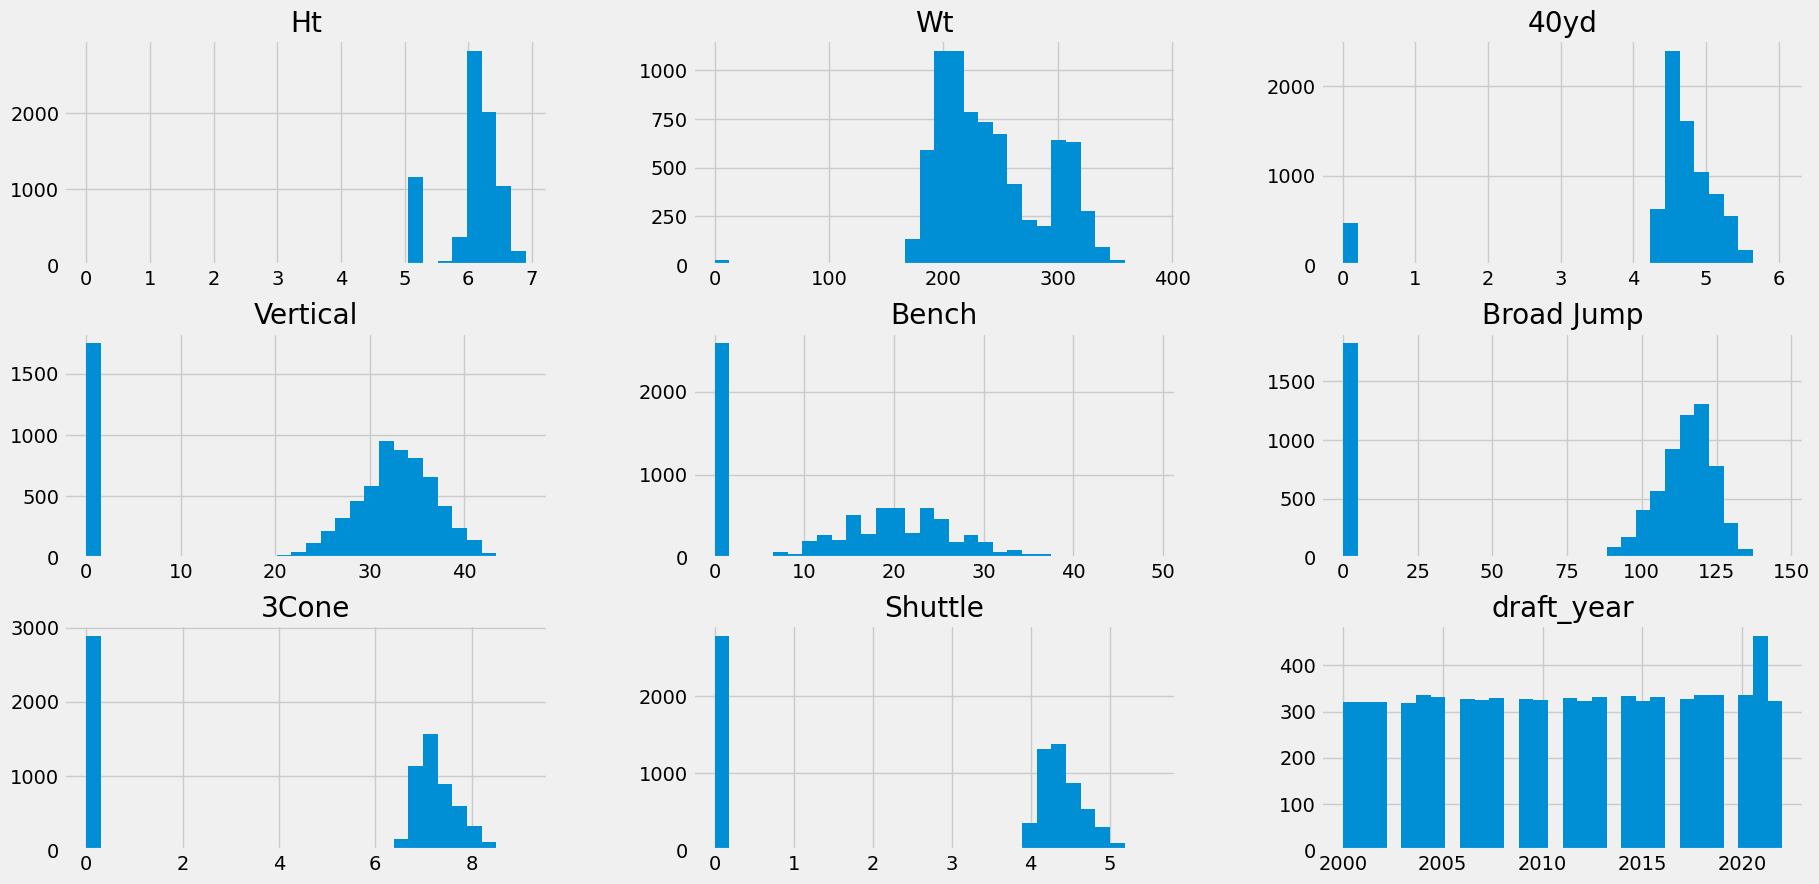

In [15]:
df.hist(bins=30, figsize=(20, 10))

/tmp/ipykernel_20/2404257666.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<AxesSubplot: >

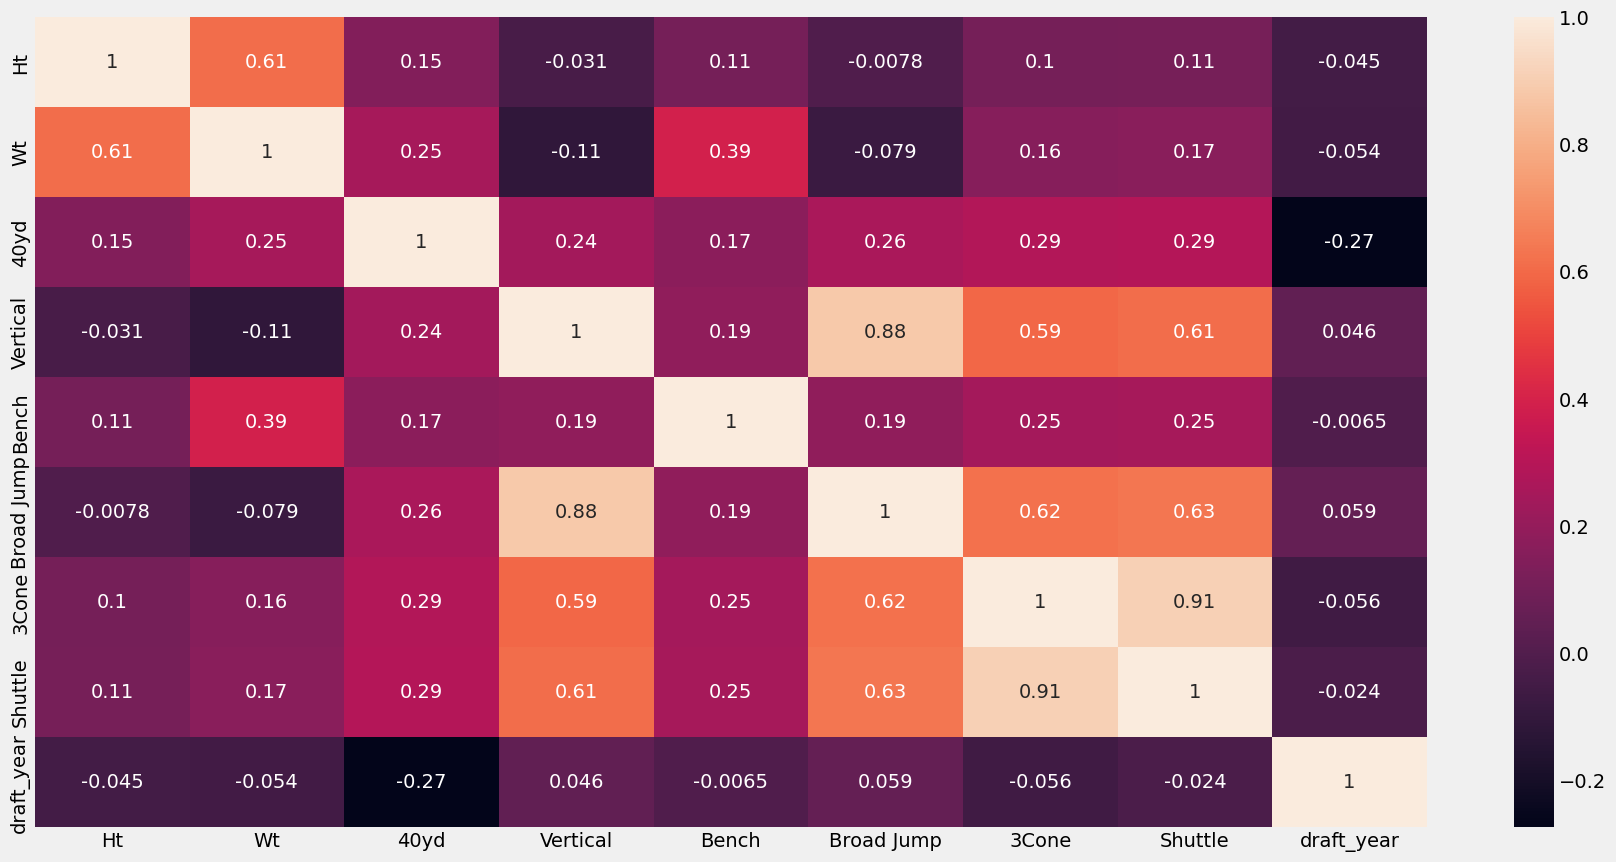

In [16]:
correlations = df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot=True)

Text(0, 0.5, '40yd')

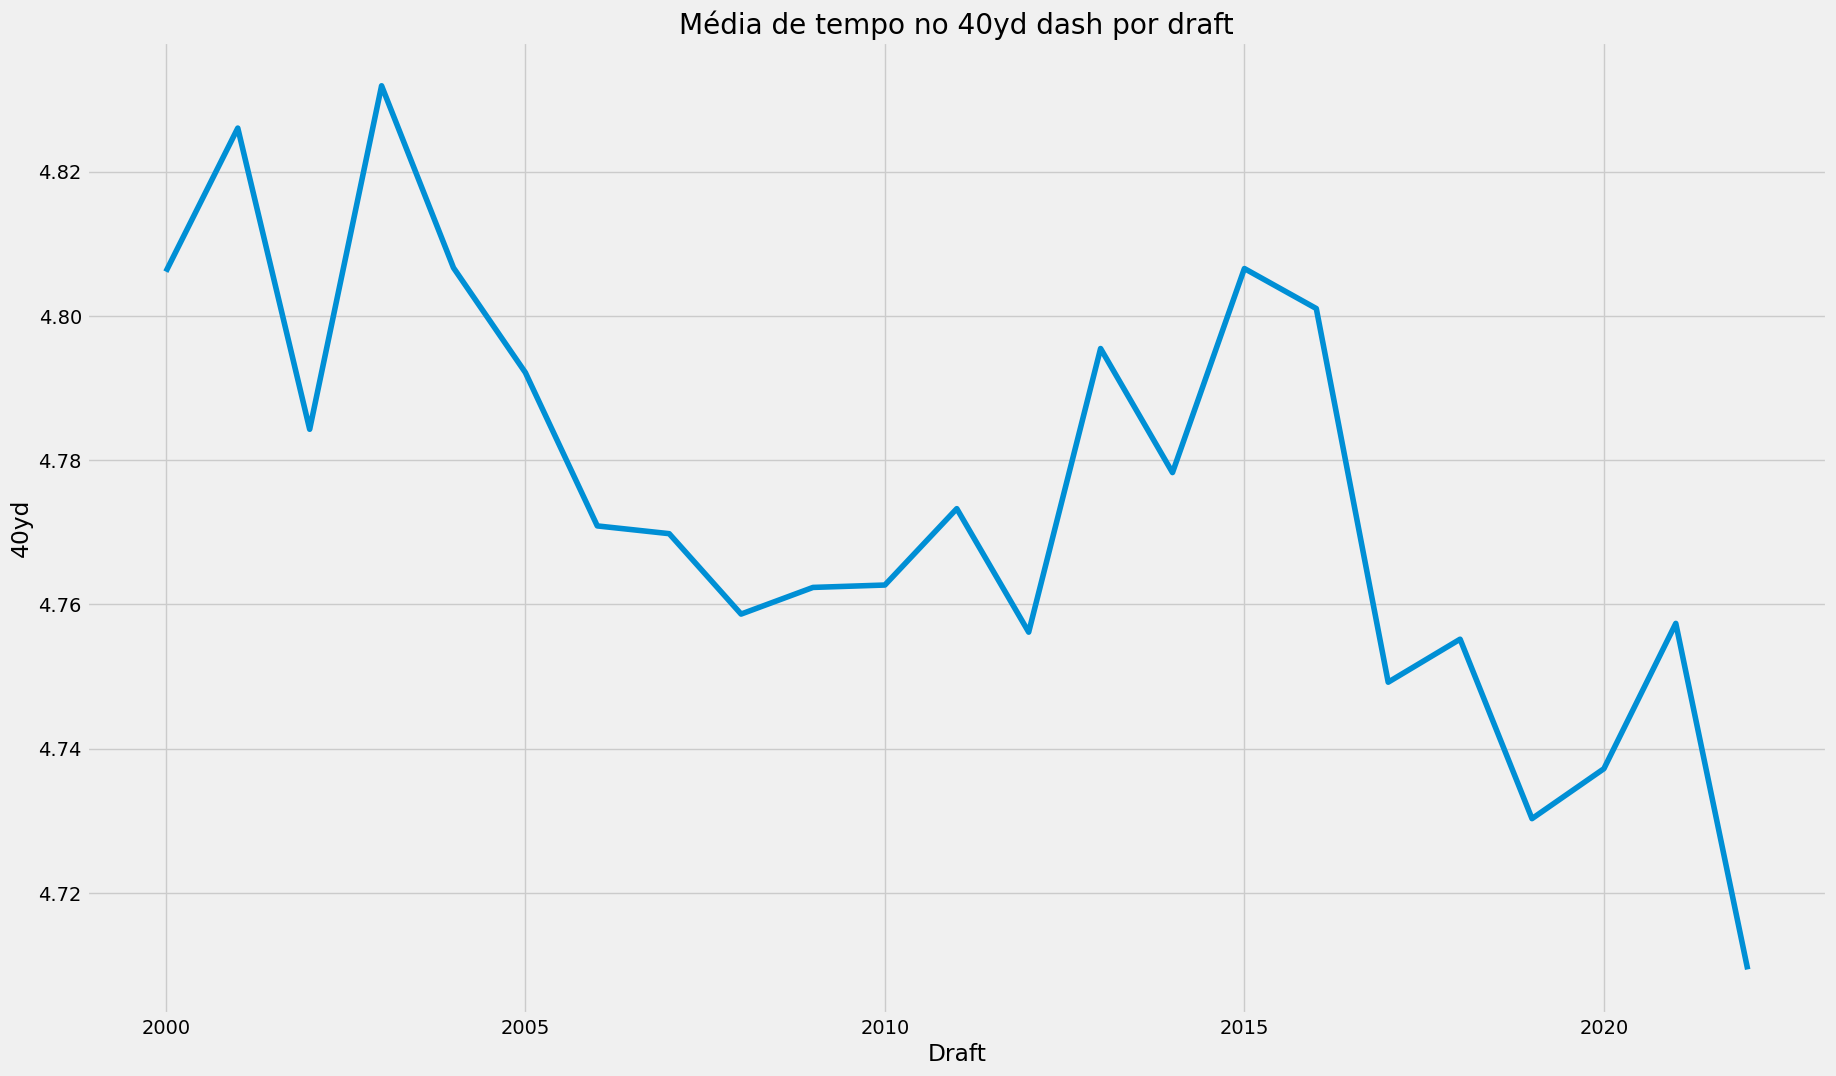

In [17]:
mean_40yd_per_year_df =  df[df['40yd'] > 0]
mean_40yd_per_year_df = mean_40yd_per_year_df.groupby('draft_year')[['40yd']].mean().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=mean_40yd_per_year_df, x='draft_year', y='40yd')
plt.title('Média de tempo no 40yd dash por draft')
plt.xlabel('Draft')
plt.ylabel('40yd')

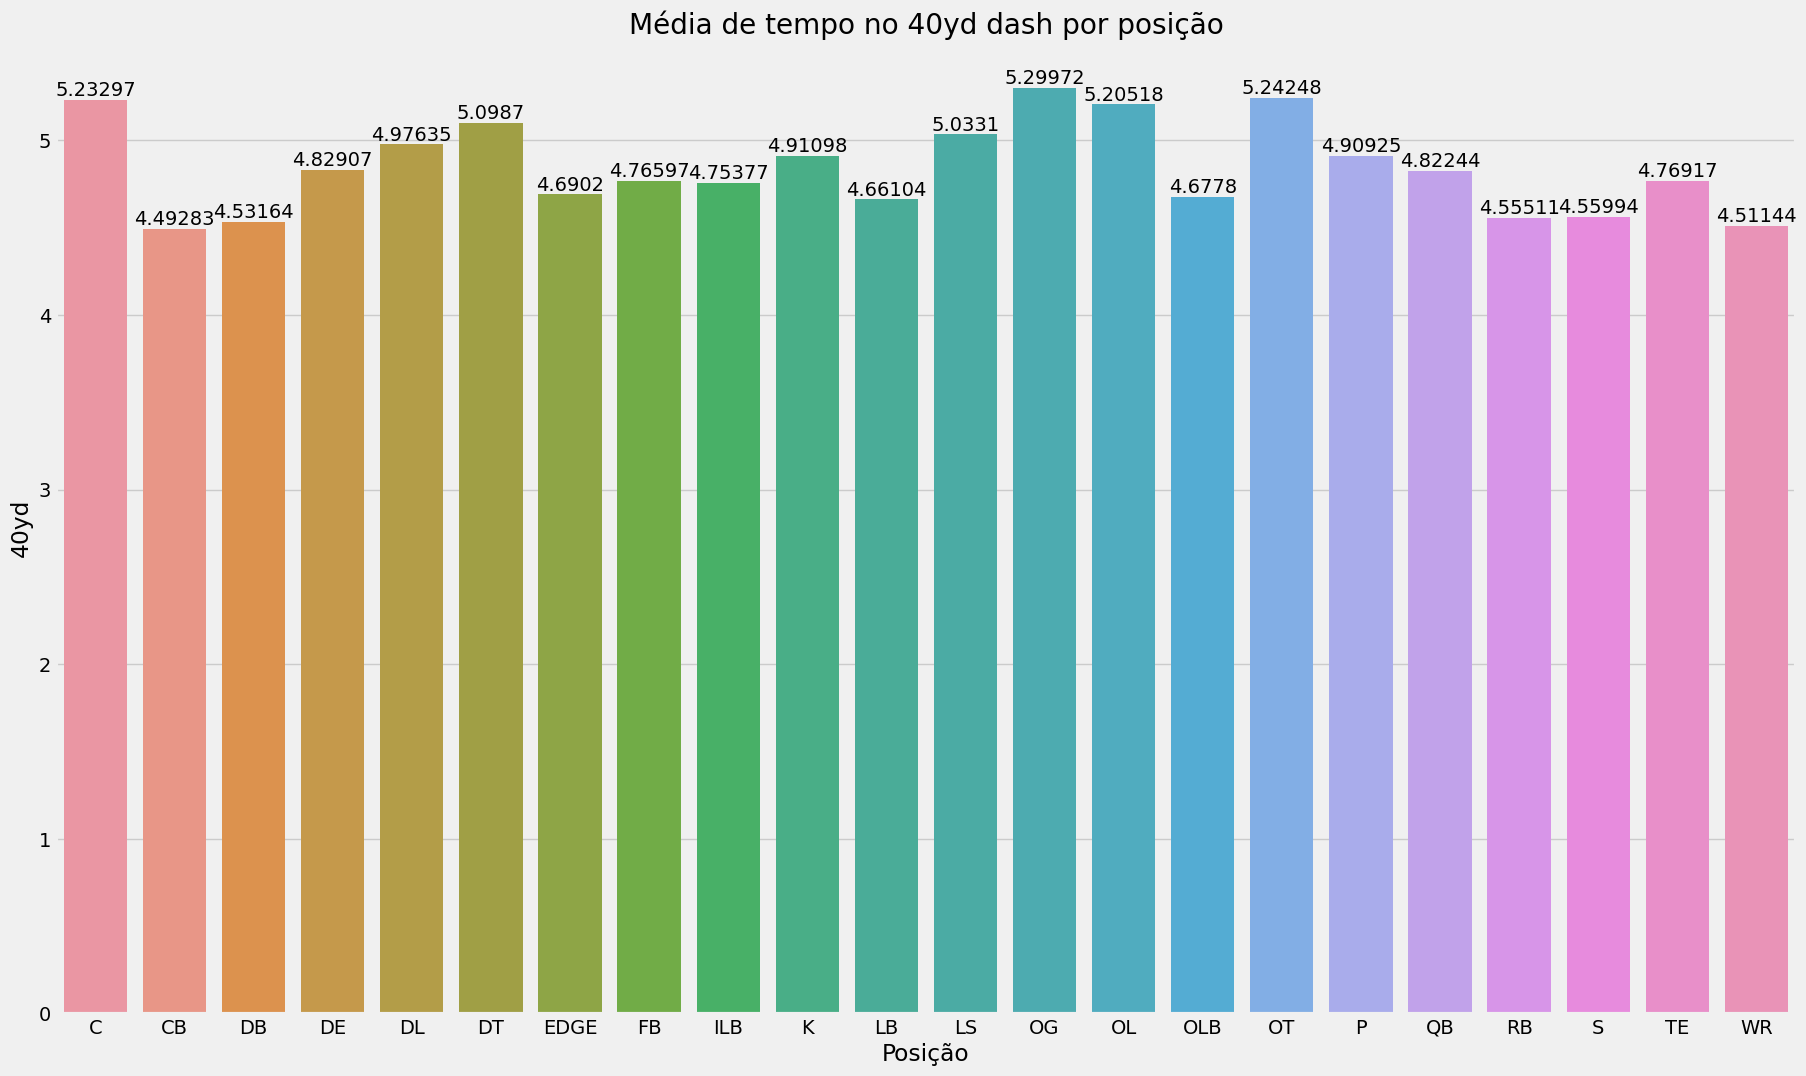

In [18]:
mean_40yd_per_pos_df = df[df['40yd'] > 0]
mean_40yd_per_pos_df = mean_40yd_per_pos_df.groupby('Pos')[['40yd']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_40yd_per_pos_df, x='Pos', y='40yd', errwidth=0)
plt.title('Média de tempo no 40yd dash por posição')
plt.xlabel('Posição')
plt.ylabel('40yd')

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'Shuttle')

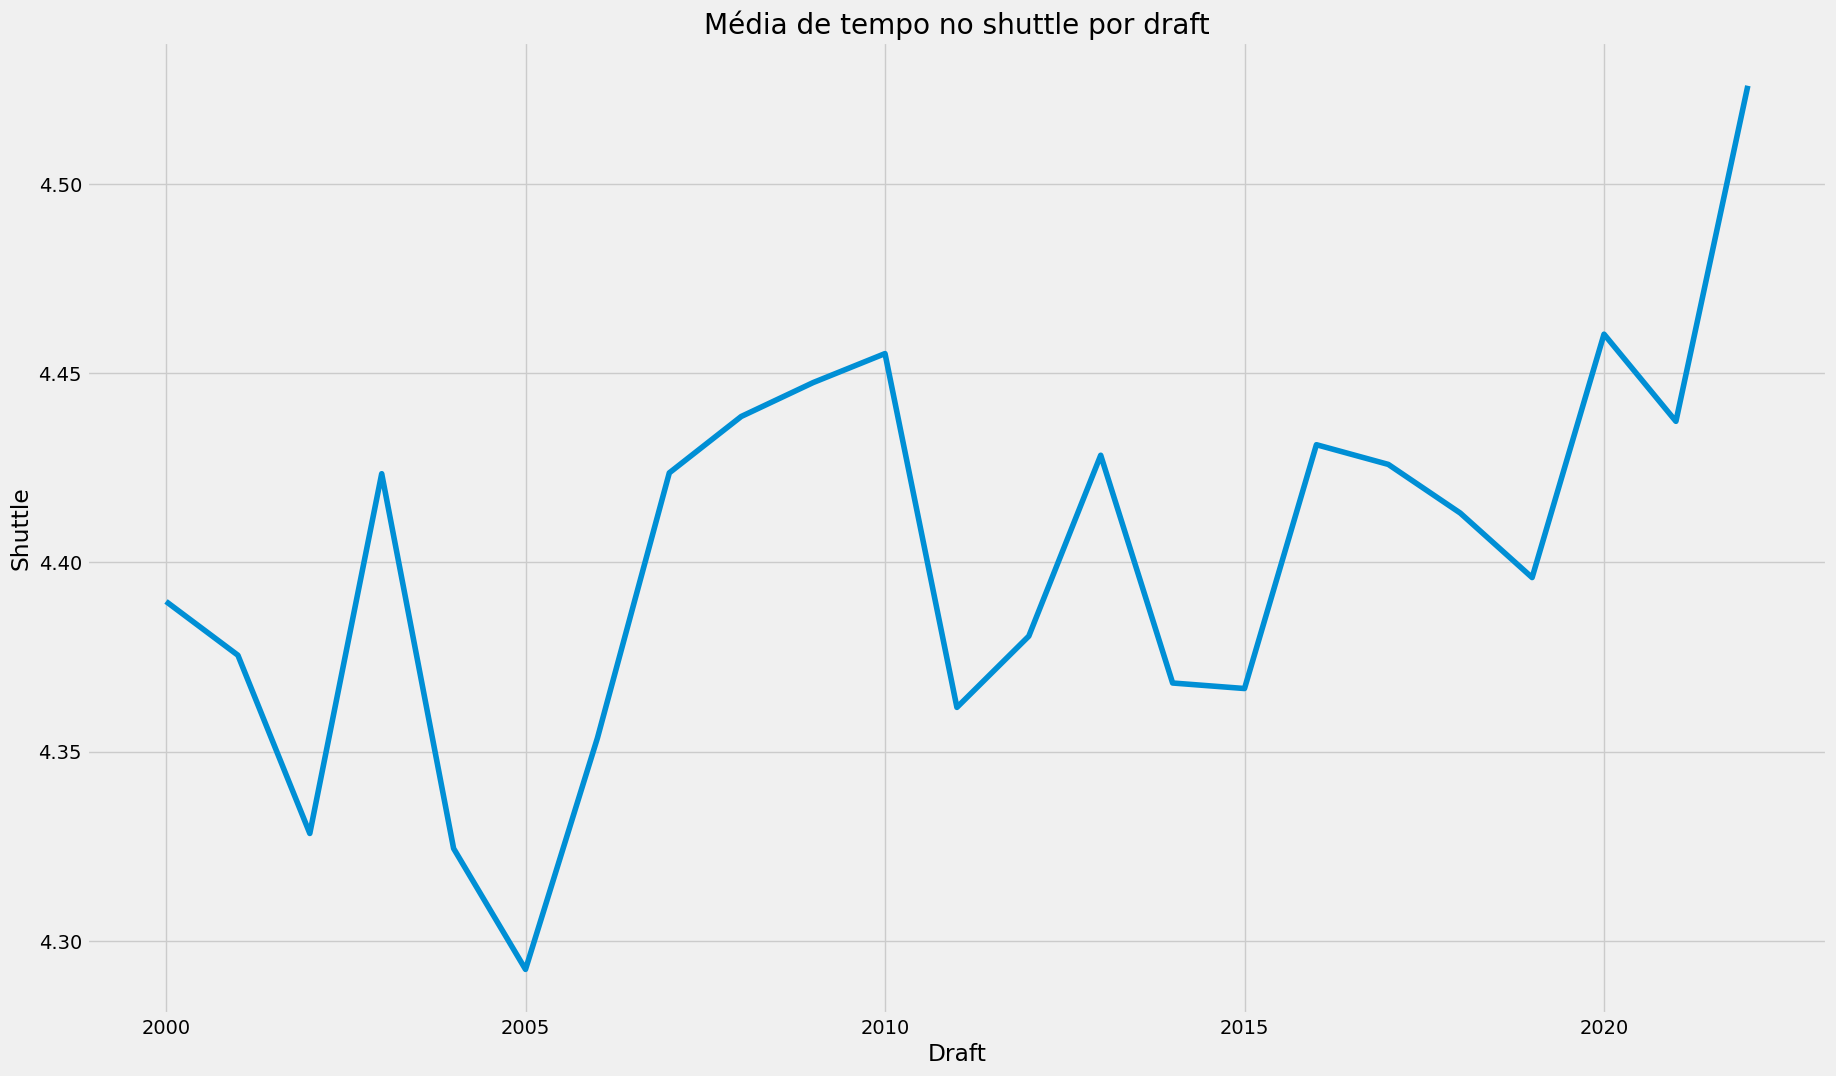

In [19]:
mean_shuttle_per_year_df =  df[df['Shuttle'] > 0]
mean_shuttle_per_year_df = mean_shuttle_per_year_df.groupby('draft_year')[['Shuttle']].mean().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=mean_shuttle_per_year_df, x='draft_year', y='Shuttle')
plt.title('Média de tempo no shuttle por draft')
plt.xlabel('Draft')
plt.ylabel('Shuttle')

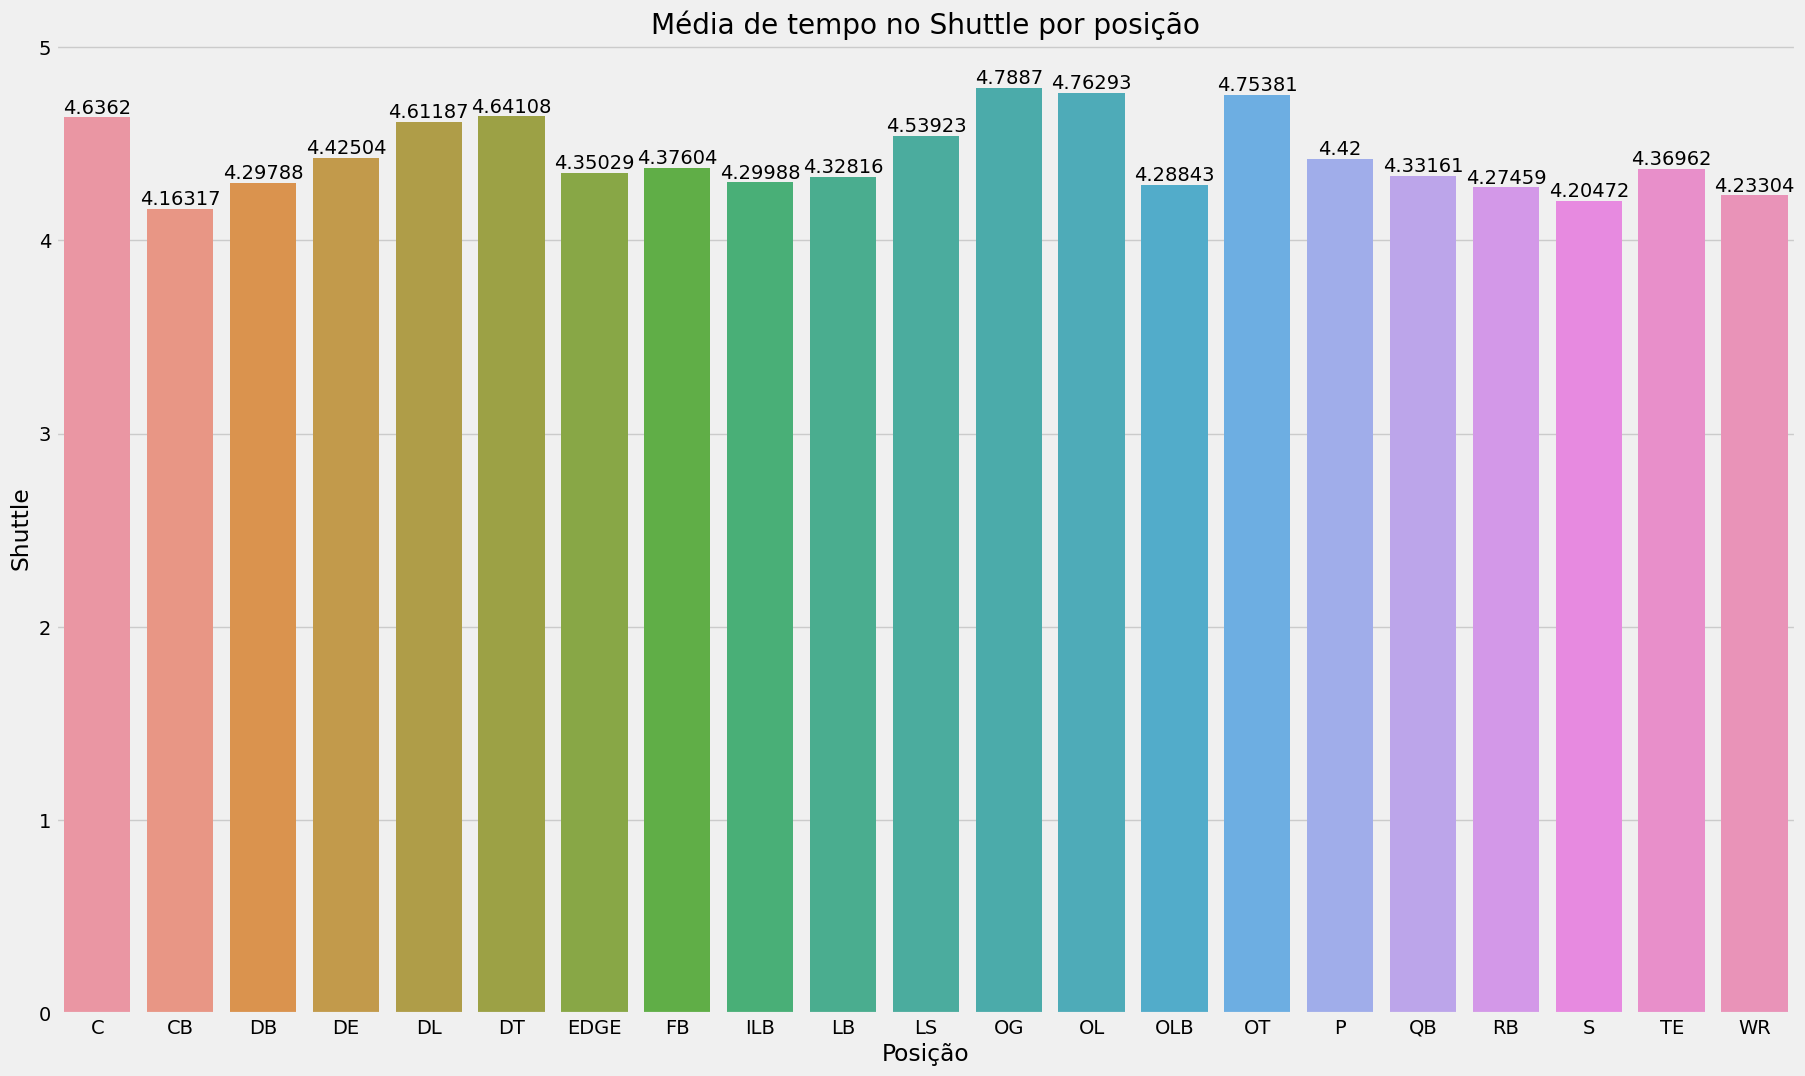

In [20]:
mean_shuttle_per_pos_df = df[df['Shuttle'] > 0]
mean_shuttle_per_pos_df = mean_shuttle_per_pos_df.groupby('Pos')[['Shuttle']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_shuttle_per_pos_df, x='Pos', y='Shuttle', errwidth=0)
plt.title('Média de tempo no Shuttle por posição')
plt.xlabel('Posição')
plt.ylabel('Shuttle')

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'Vertical')

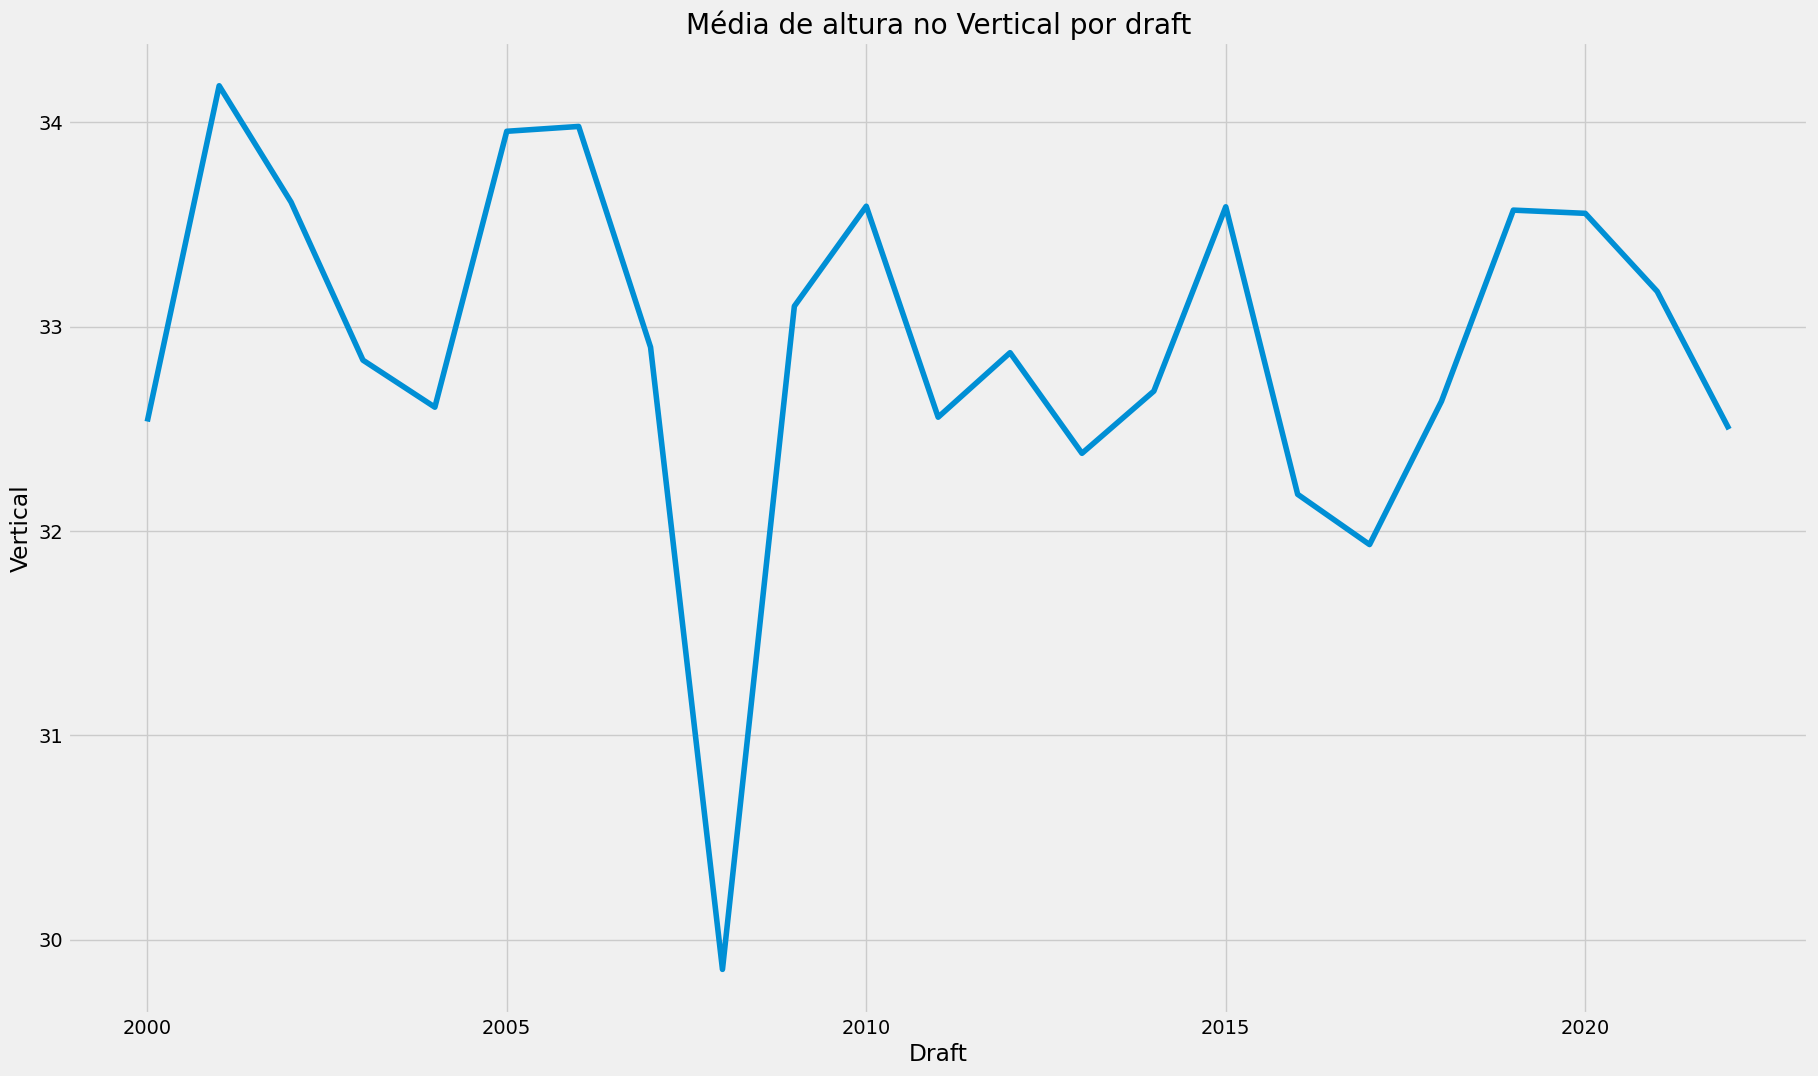

In [21]:
mean_vertical_per_year_df =  df[df['Vertical'] > 0]
mean_vertical_per_year_df = mean_vertical_per_year_df.groupby('draft_year')[['Vertical']].mean().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=mean_vertical_per_year_df, x='draft_year', y='Vertical')
plt.title('Média de altura no Vertical por draft')
plt.xlabel('Draft')
plt.ylabel('Vertical')

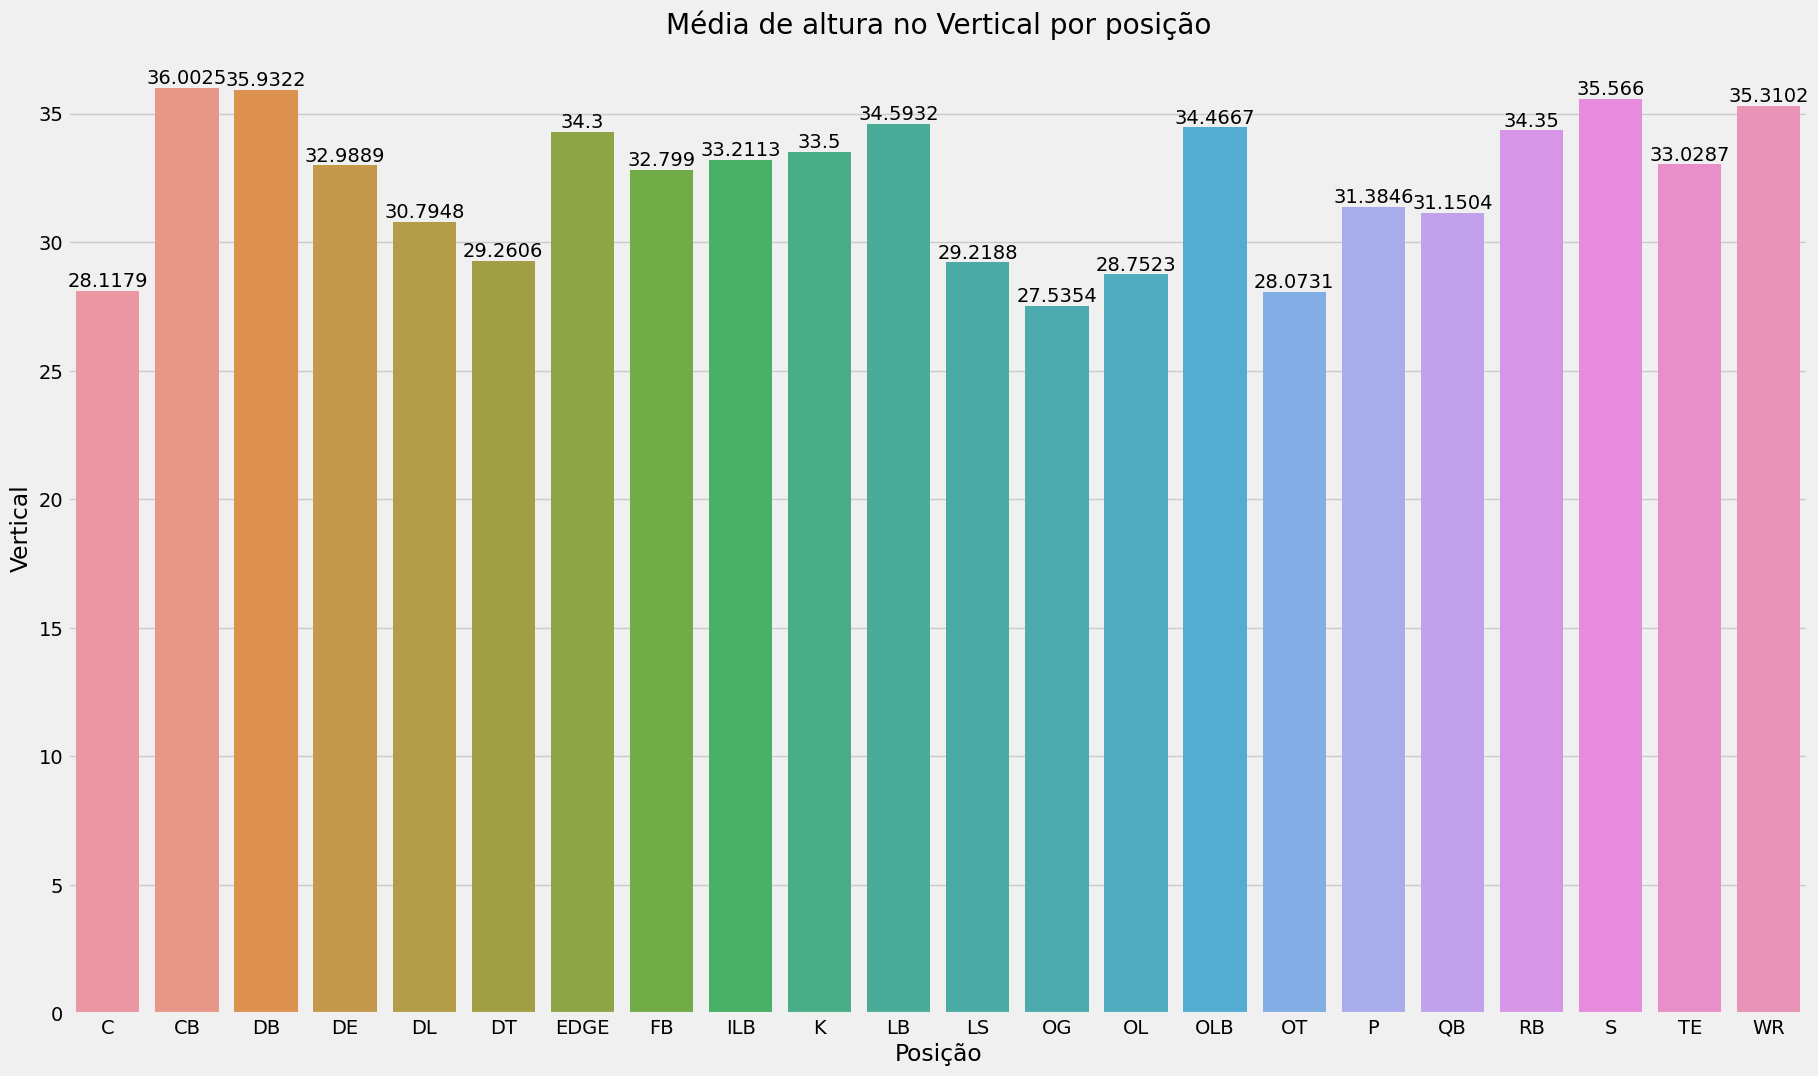

In [22]:
mean_vertical_per_pos_df = df[df['Vertical'] > 0]
mean_vertical_per_pos_df = mean_vertical_per_pos_df.groupby('Pos')[['Vertical']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_vertical_per_pos_df, x='Pos', y='Vertical', errwidth=0)
plt.title('Média de altura no Vertical por posição')
plt.xlabel('Posição')
plt.ylabel('Vertical')

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'Bench')

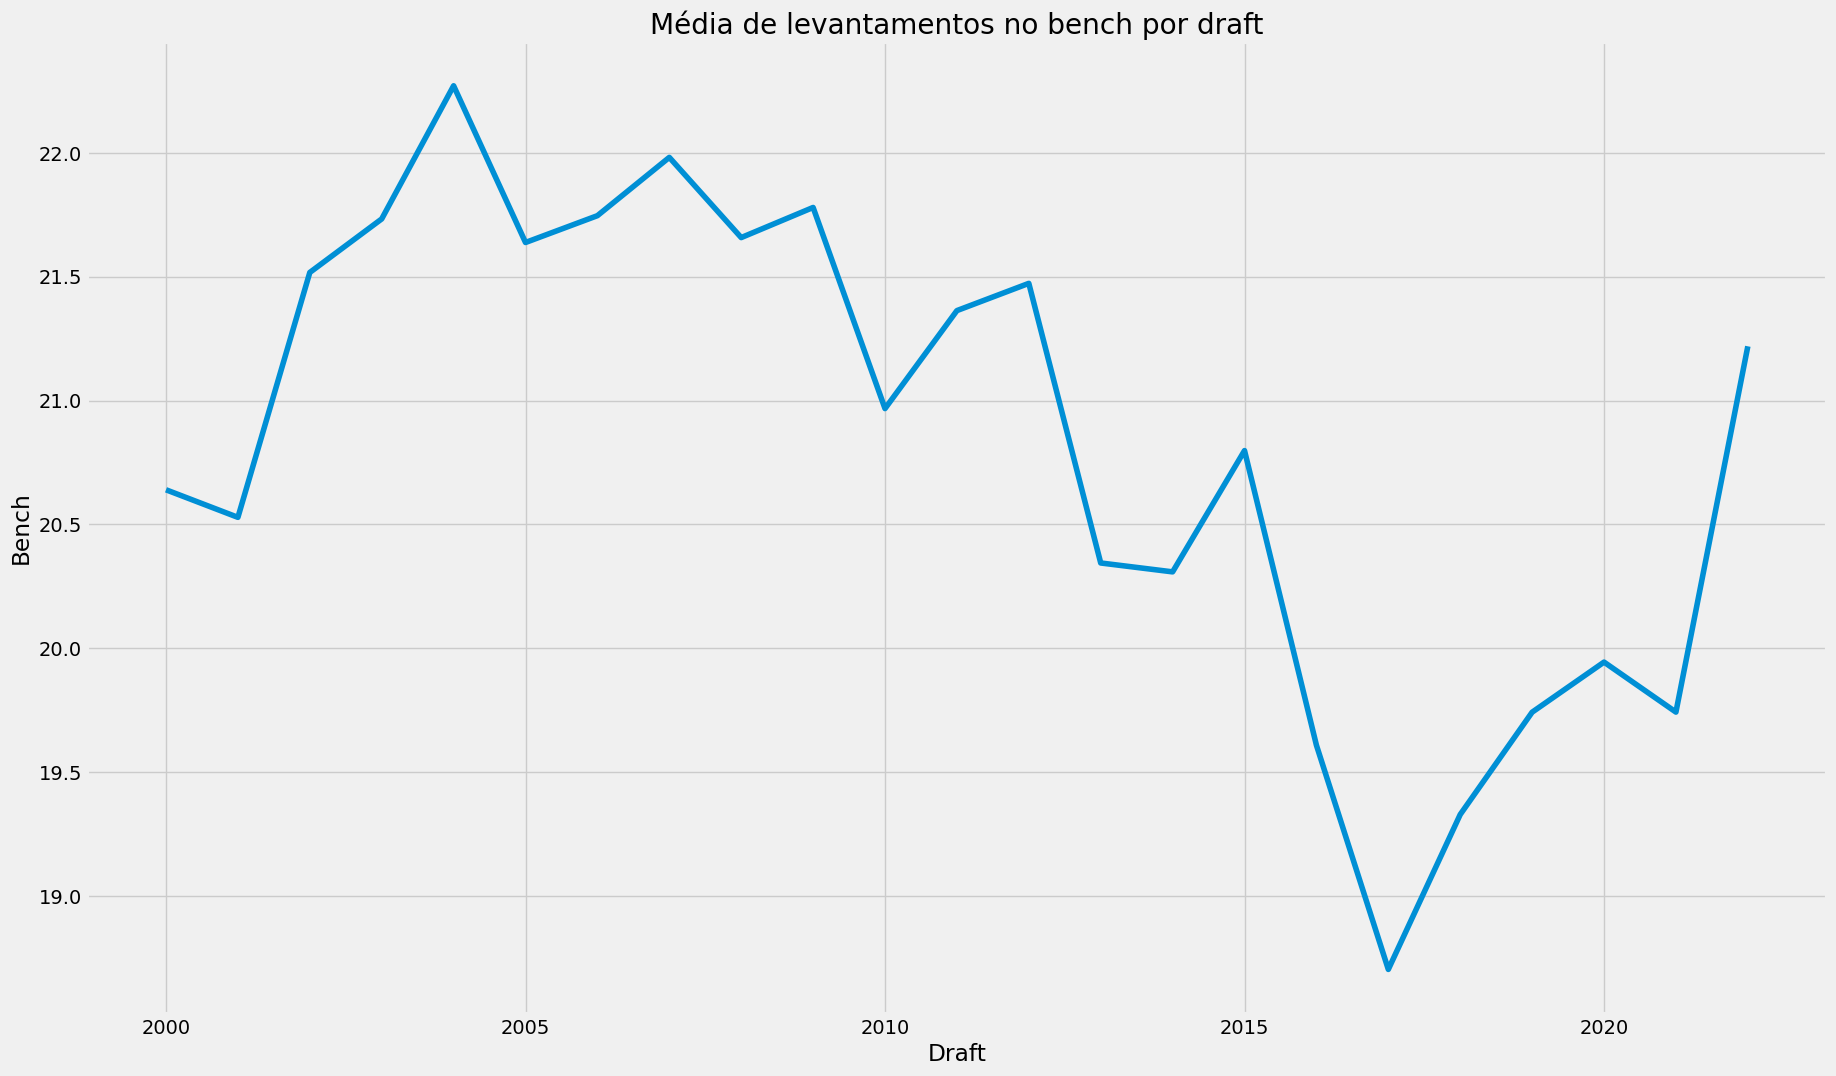

In [23]:
mean_bench_per_year_df =  df[df['Bench'] > 0]
mean_bench_per_year_df = mean_bench_per_year_df.groupby('draft_year')[['Bench']].mean().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=mean_bench_per_year_df, x='draft_year', y='Bench')
plt.title('Média de levantamentos no bench por draft')
plt.xlabel('Draft')
plt.ylabel('Bench')

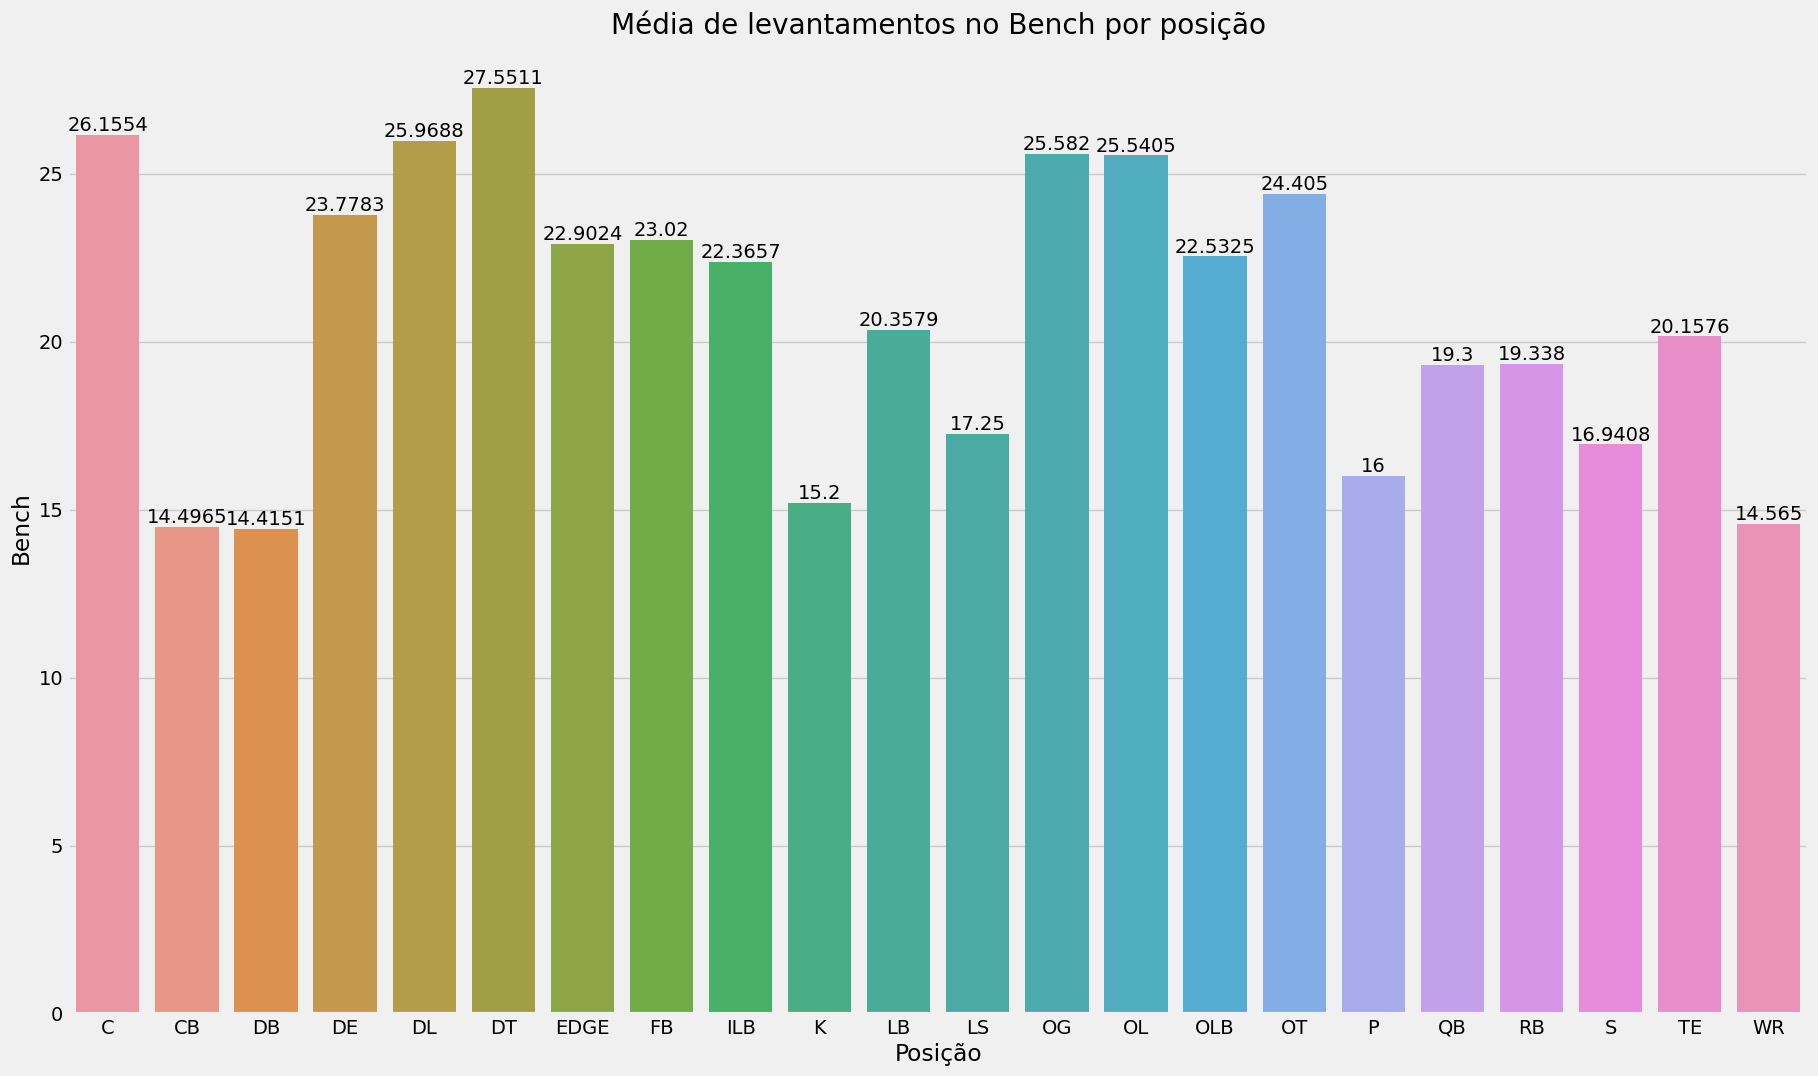

In [24]:
mean_bench_per_pos_df = df[df['Bench'] > 0]
mean_bench_per_pos_df = mean_bench_per_pos_df.groupby('Pos')[['Bench']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_bench_per_pos_df, x='Pos', y='Bench', errwidth=0)
plt.title('Média de levantamentos no Bench por posição')
plt.xlabel('Posição')
plt.ylabel('Bench')

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'broad_jump')

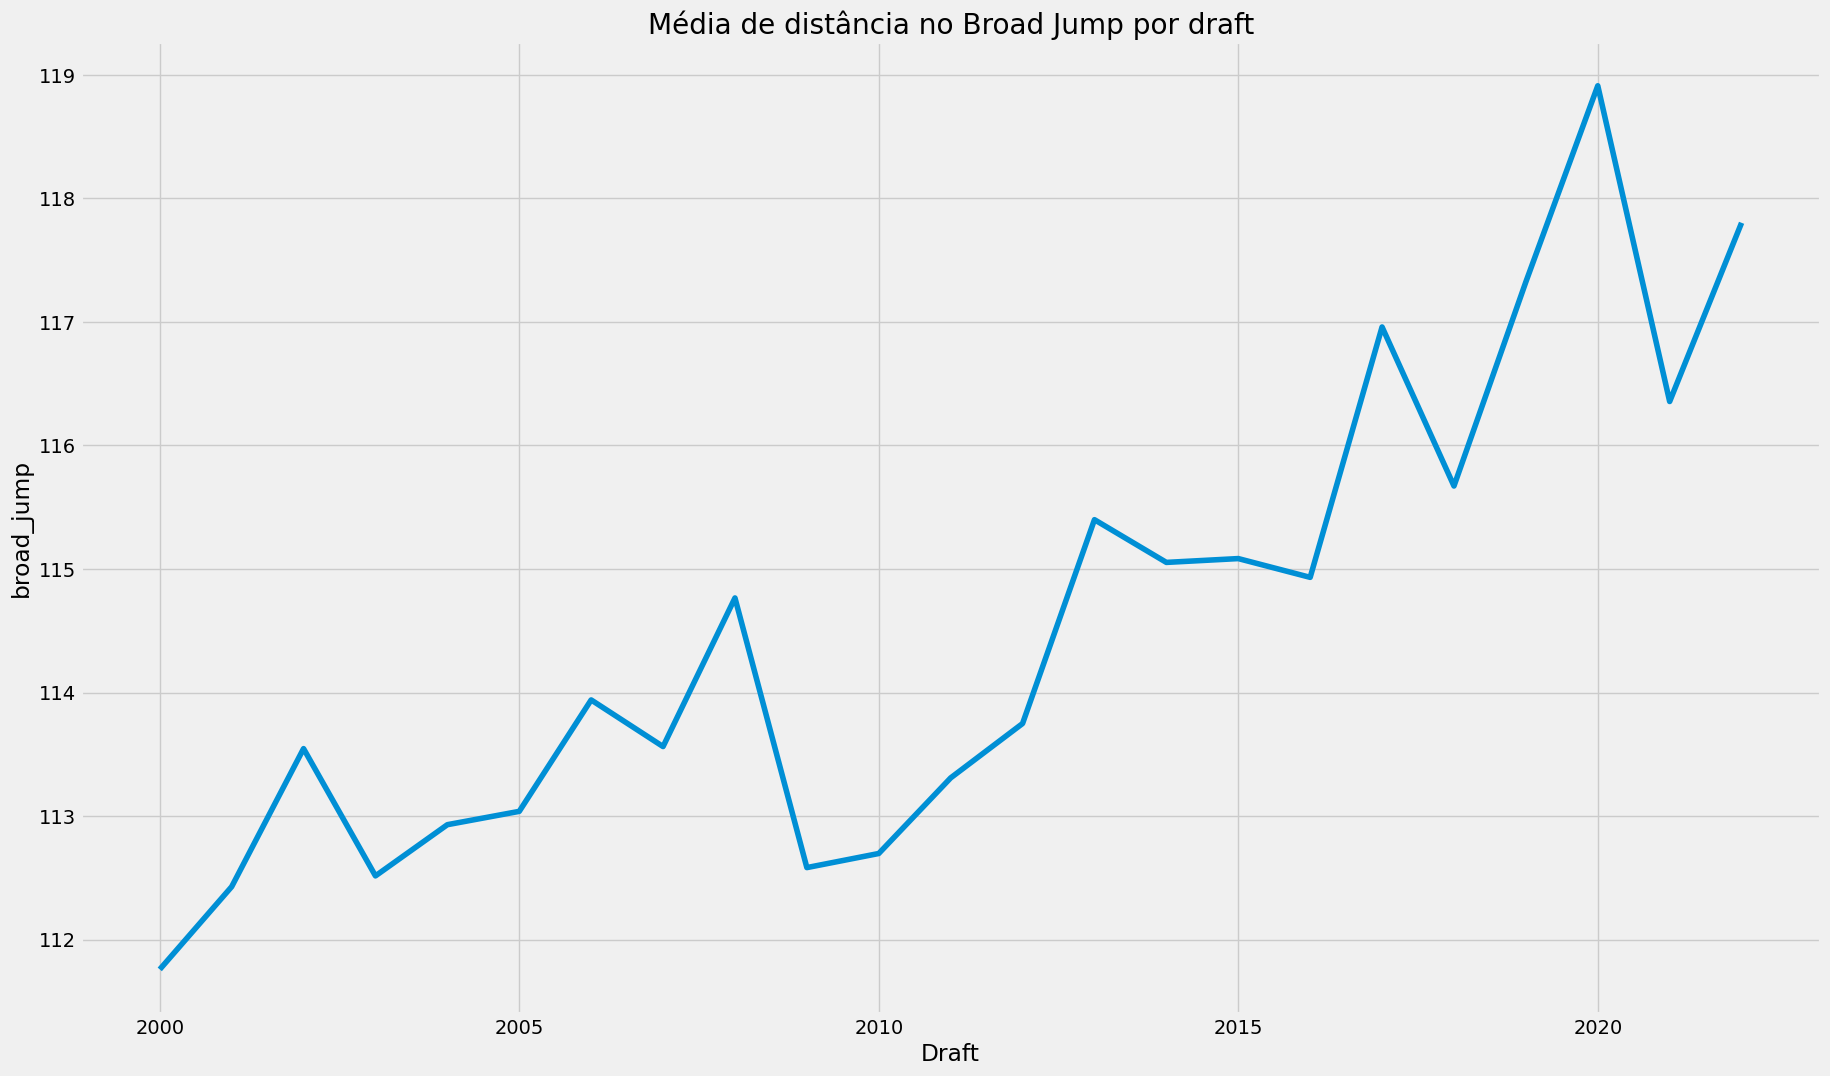

In [25]:
mean_broad_jump_per_year_df =  df[df['Broad Jump'] > 0]
mean_broad_jump_per_year_df = mean_broad_jump_per_year_df.groupby('draft_year')[['Broad Jump']].mean().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=mean_broad_jump_per_year_df, x='draft_year', y='Broad Jump')
plt.title('Média de distância no Broad Jump por draft')
plt.xlabel('Draft')
plt.ylabel('broad_jump')

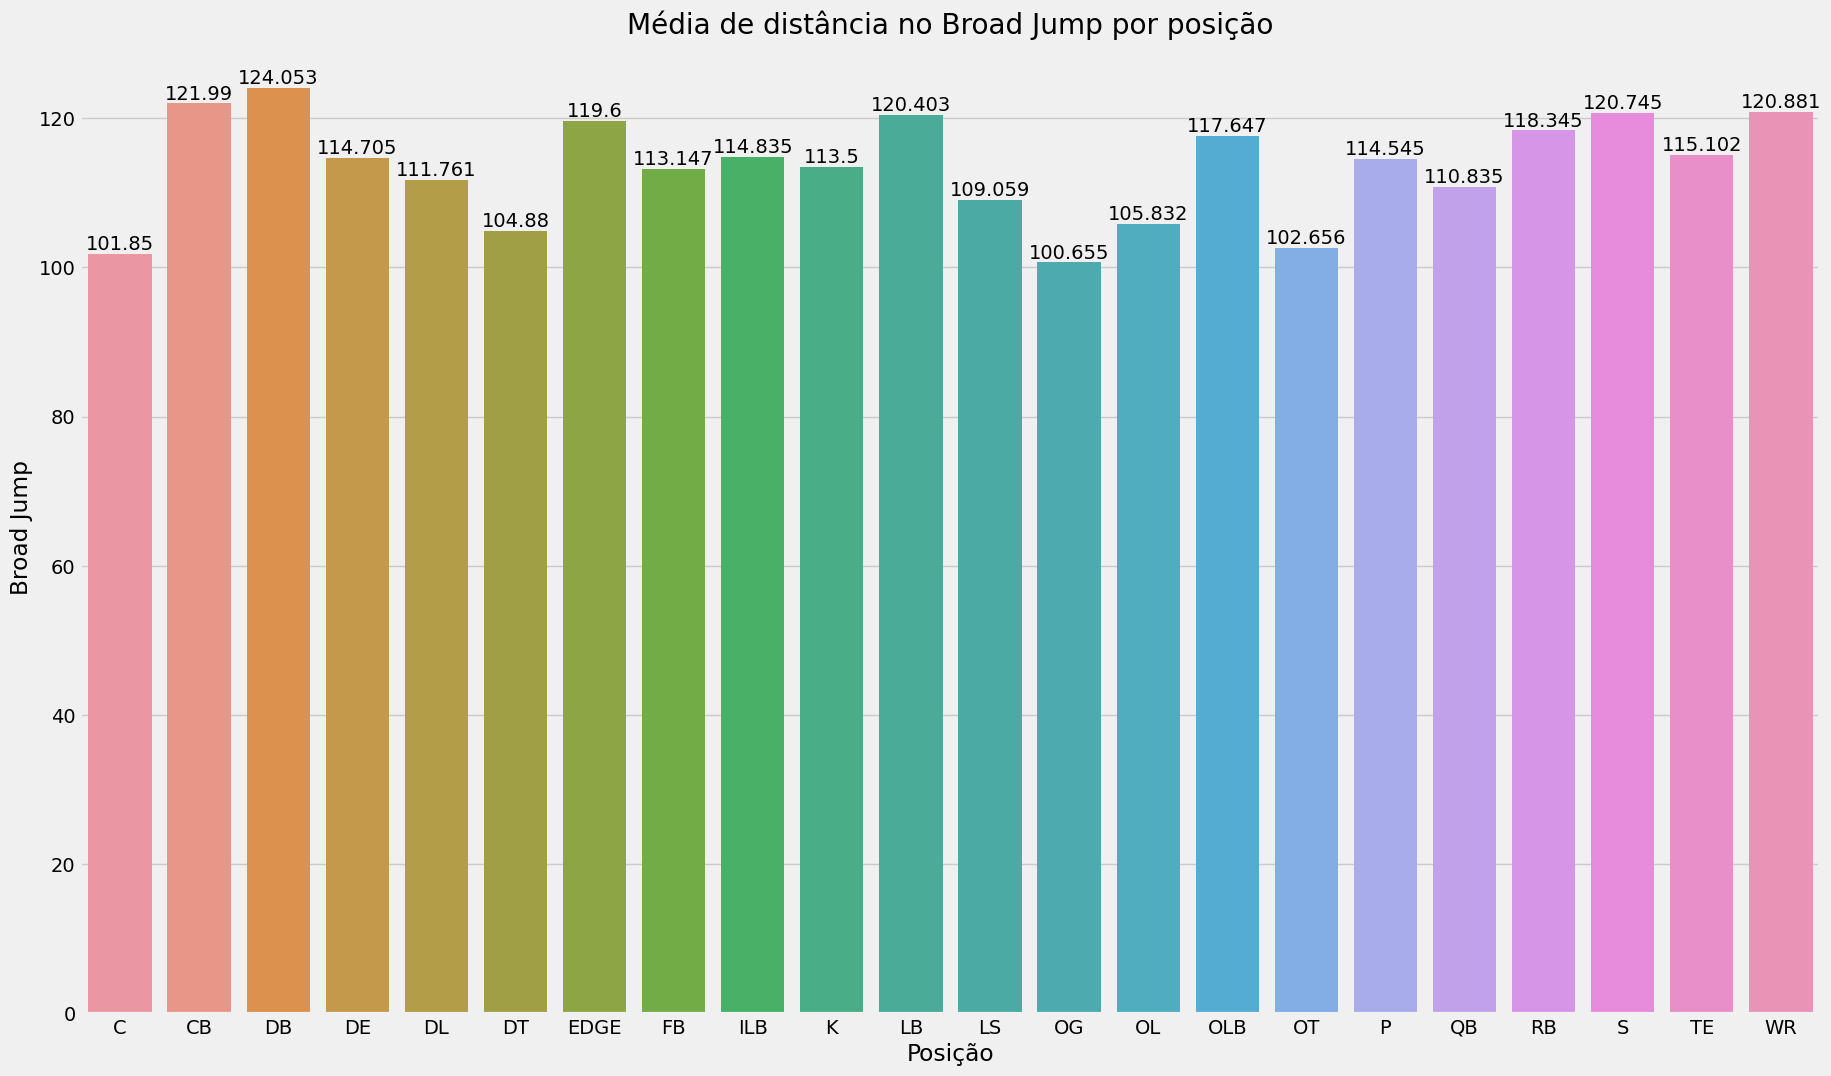

In [26]:
mean_broad_jump_per_pos_df = df[df['Broad Jump'] > 0]
mean_broad_jump_per_pos_df = mean_broad_jump_per_pos_df.groupby('Pos')[['Broad Jump']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_broad_jump_per_pos_df, x='Pos', y='Broad Jump', errwidth=0)
plt.title('Média de distância no Broad Jump por posição')
plt.xlabel('Posição')
plt.ylabel('Broad Jump')

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, '3Cone')

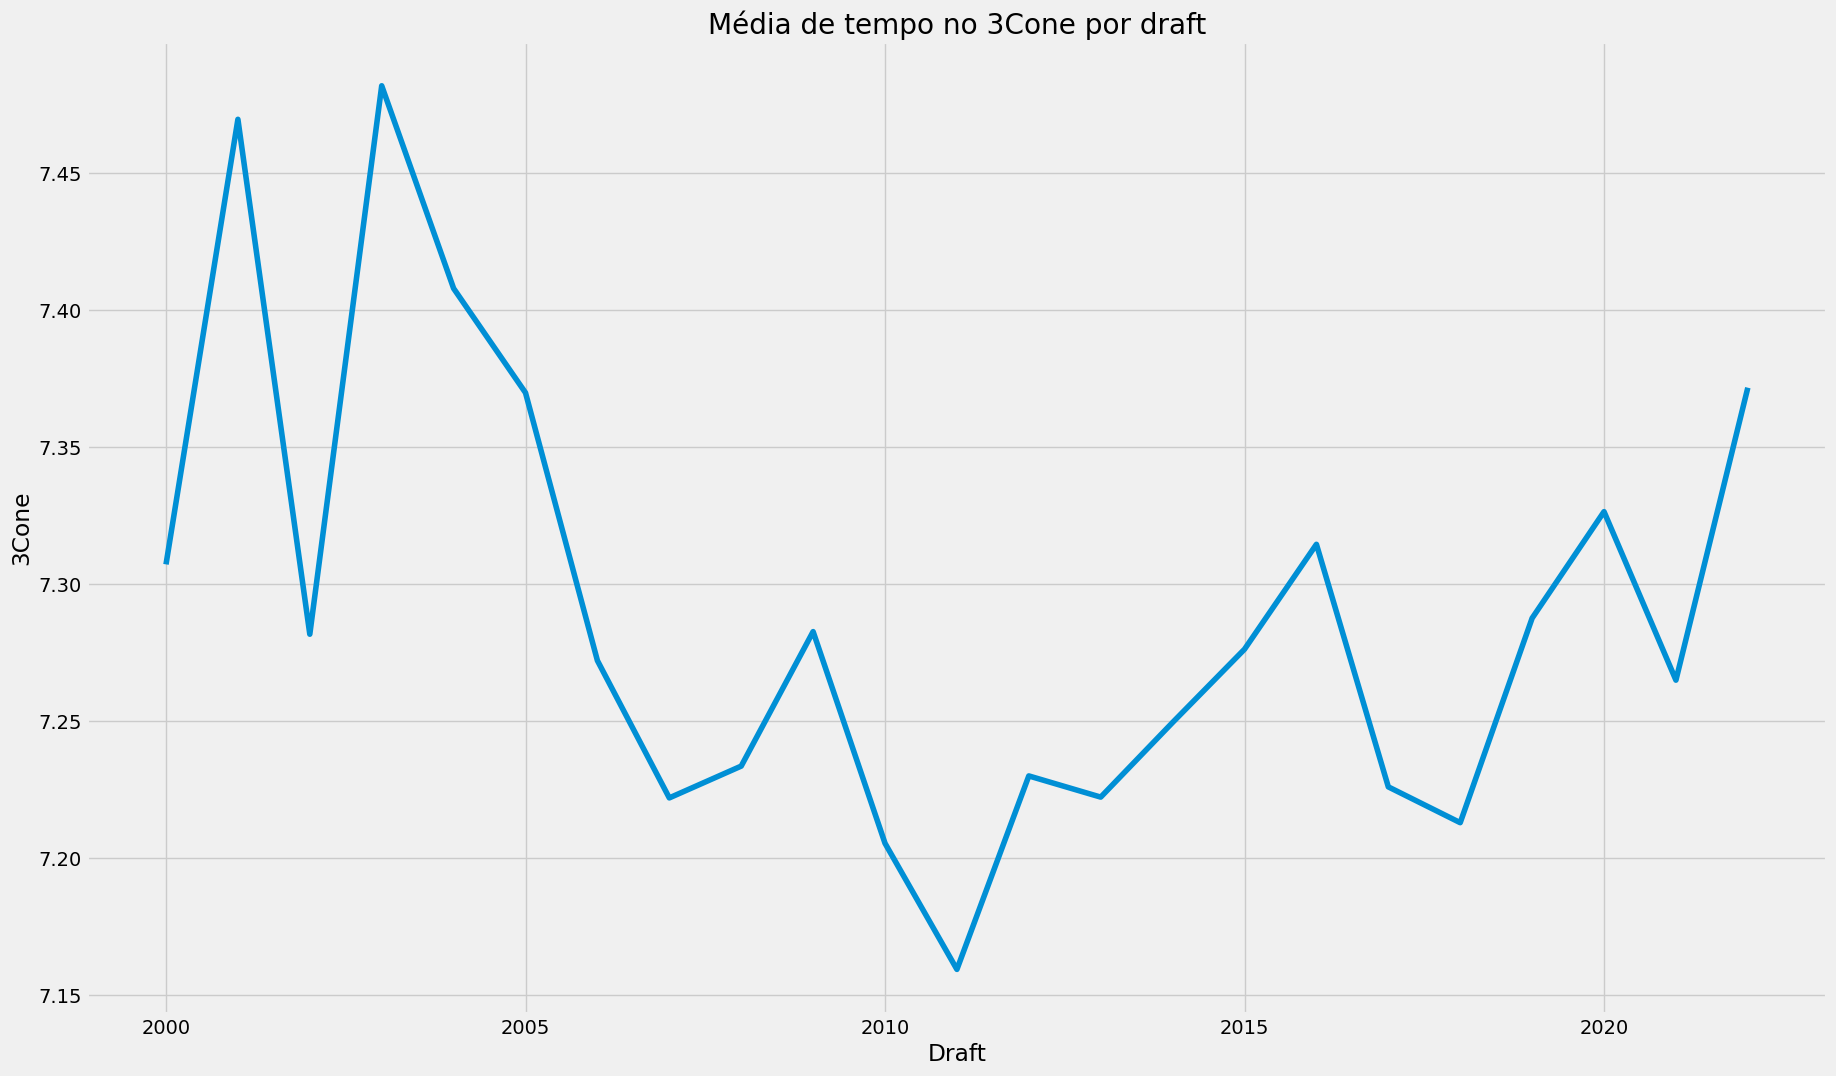

In [27]:
mean_3Cone_per_year_df =  df[df['3Cone'] > 0]
mean_3Cone_per_year_df = mean_3Cone_per_year_df.groupby('draft_year')[['3Cone']].mean().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=mean_3Cone_per_year_df, x='draft_year', y='3Cone')
plt.title('Média de tempo no 3Cone por draft')
plt.xlabel('Draft')
plt.ylabel('3Cone')

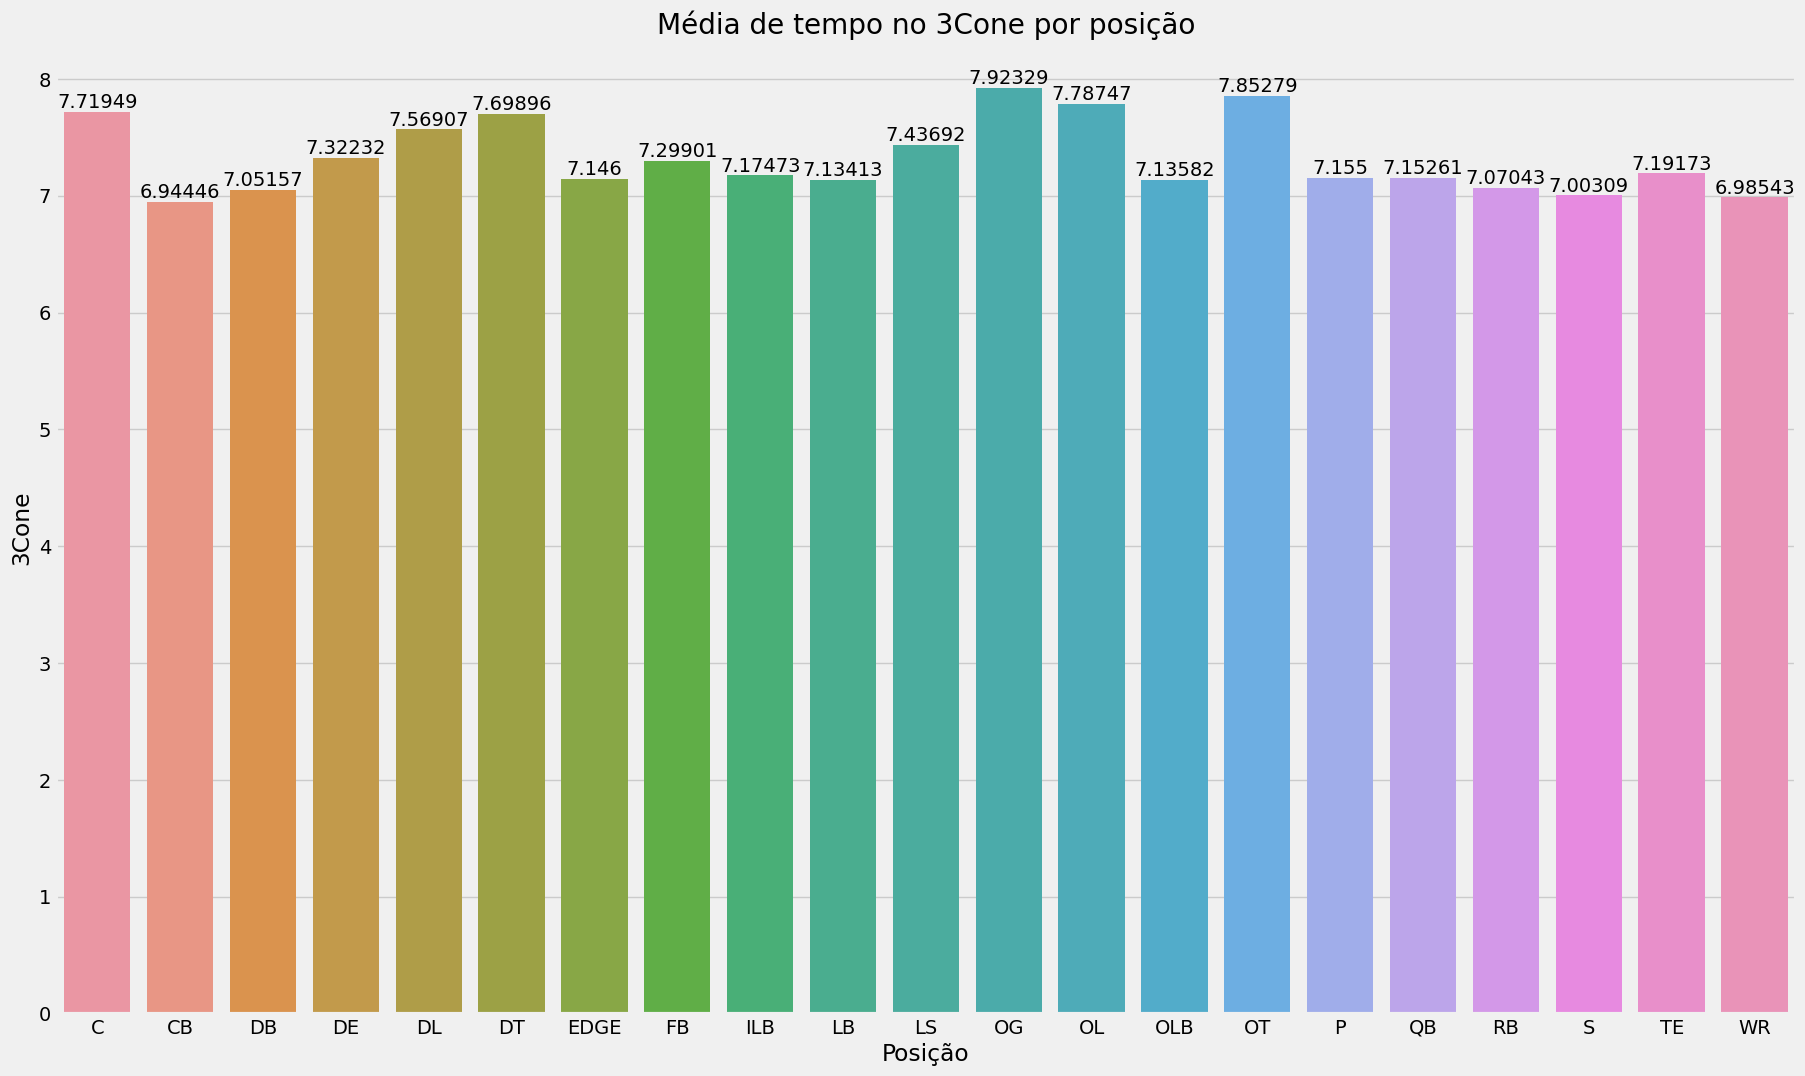

In [28]:
mean_3Cone_per_pos_df = df[df['3Cone'] > 0]
mean_3Cone_per_pos_df = mean_3Cone_per_pos_df.groupby('Pos')[['3Cone']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_3Cone_per_pos_df, x='Pos', y='3Cone', errwidth=0)
plt.title('Média de tempo no 3Cone por posição')
plt.xlabel('Posição')
plt.ylabel('3Cone')

for i in ax.containers:
    ax.bar_label(i,)

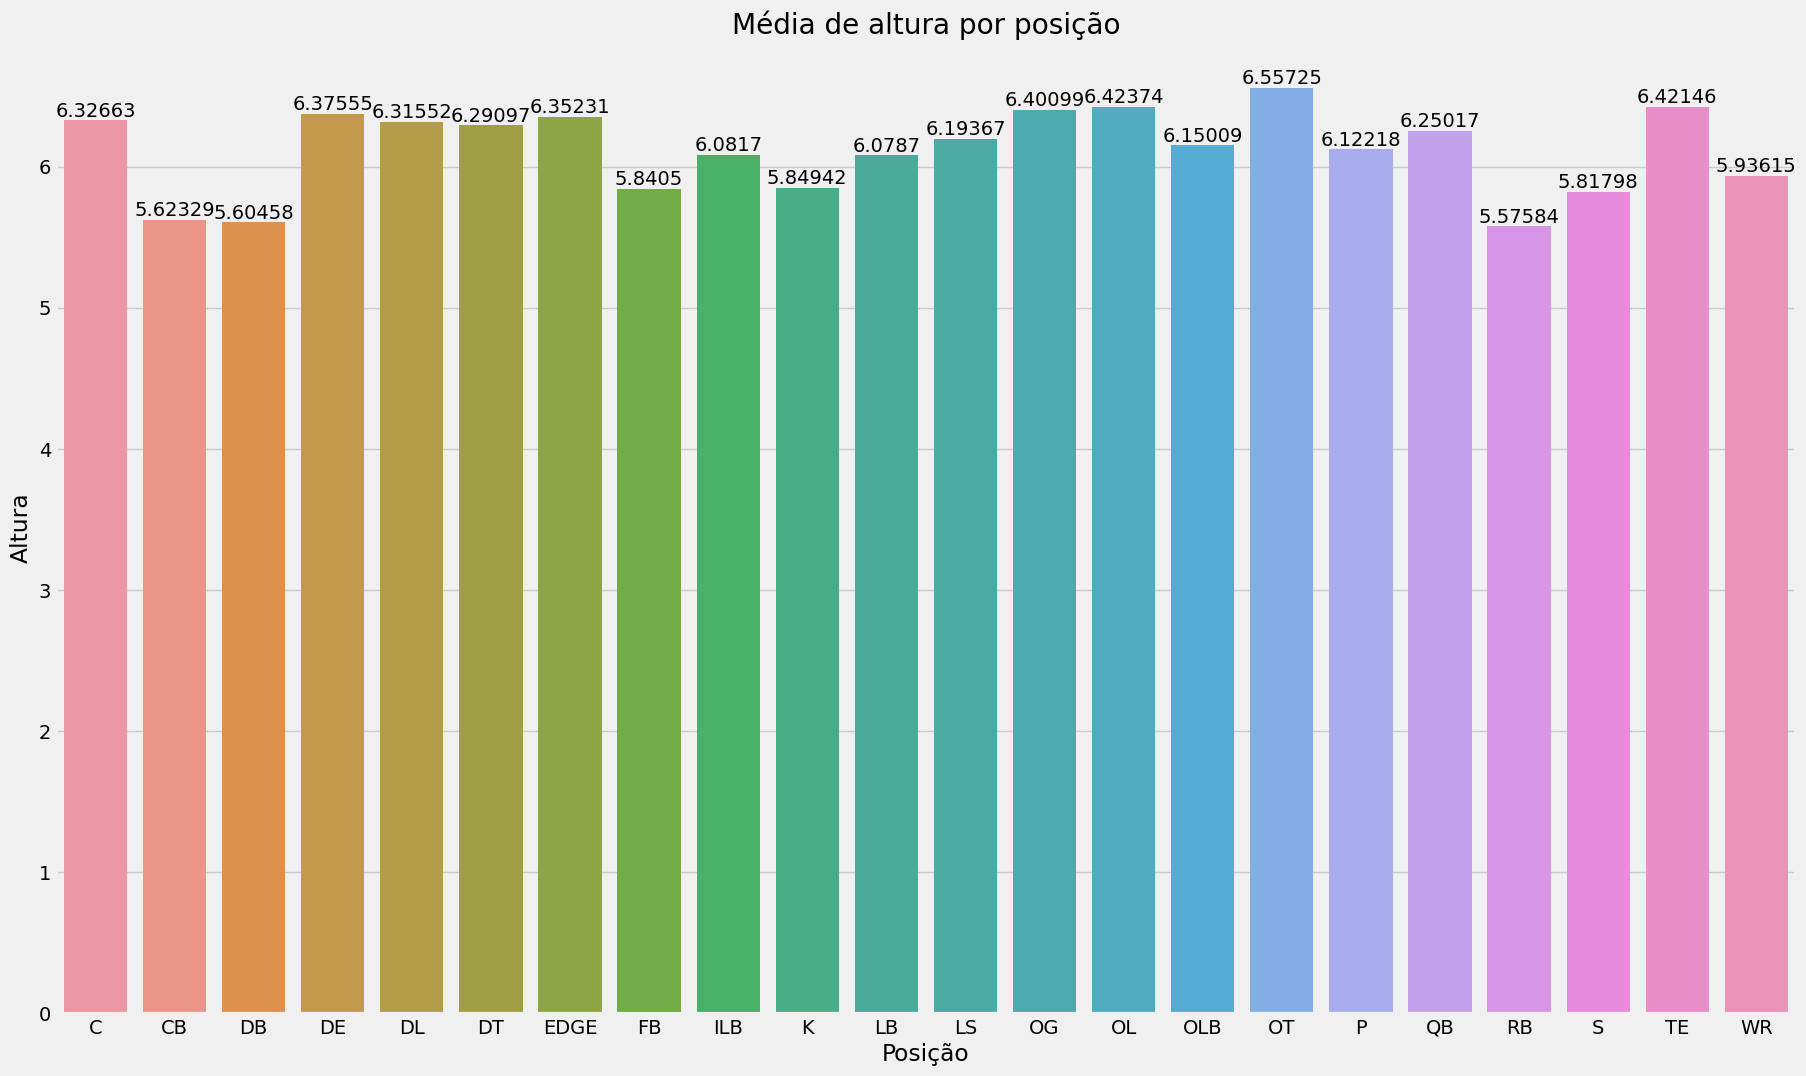

In [29]:
mean_height_per_pos_df = df[df['Ht'] > 0]
mean_height_per_pos_df = mean_height_per_pos_df.groupby('Pos')[['Ht']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_height_per_pos_df, x='Pos', y='Ht', errwidth=0)
plt.title('Média de altura por posição')
plt.xlabel('Posição')
plt.ylabel('Altura')

for i in ax.containers:
    ax.bar_label(i,)

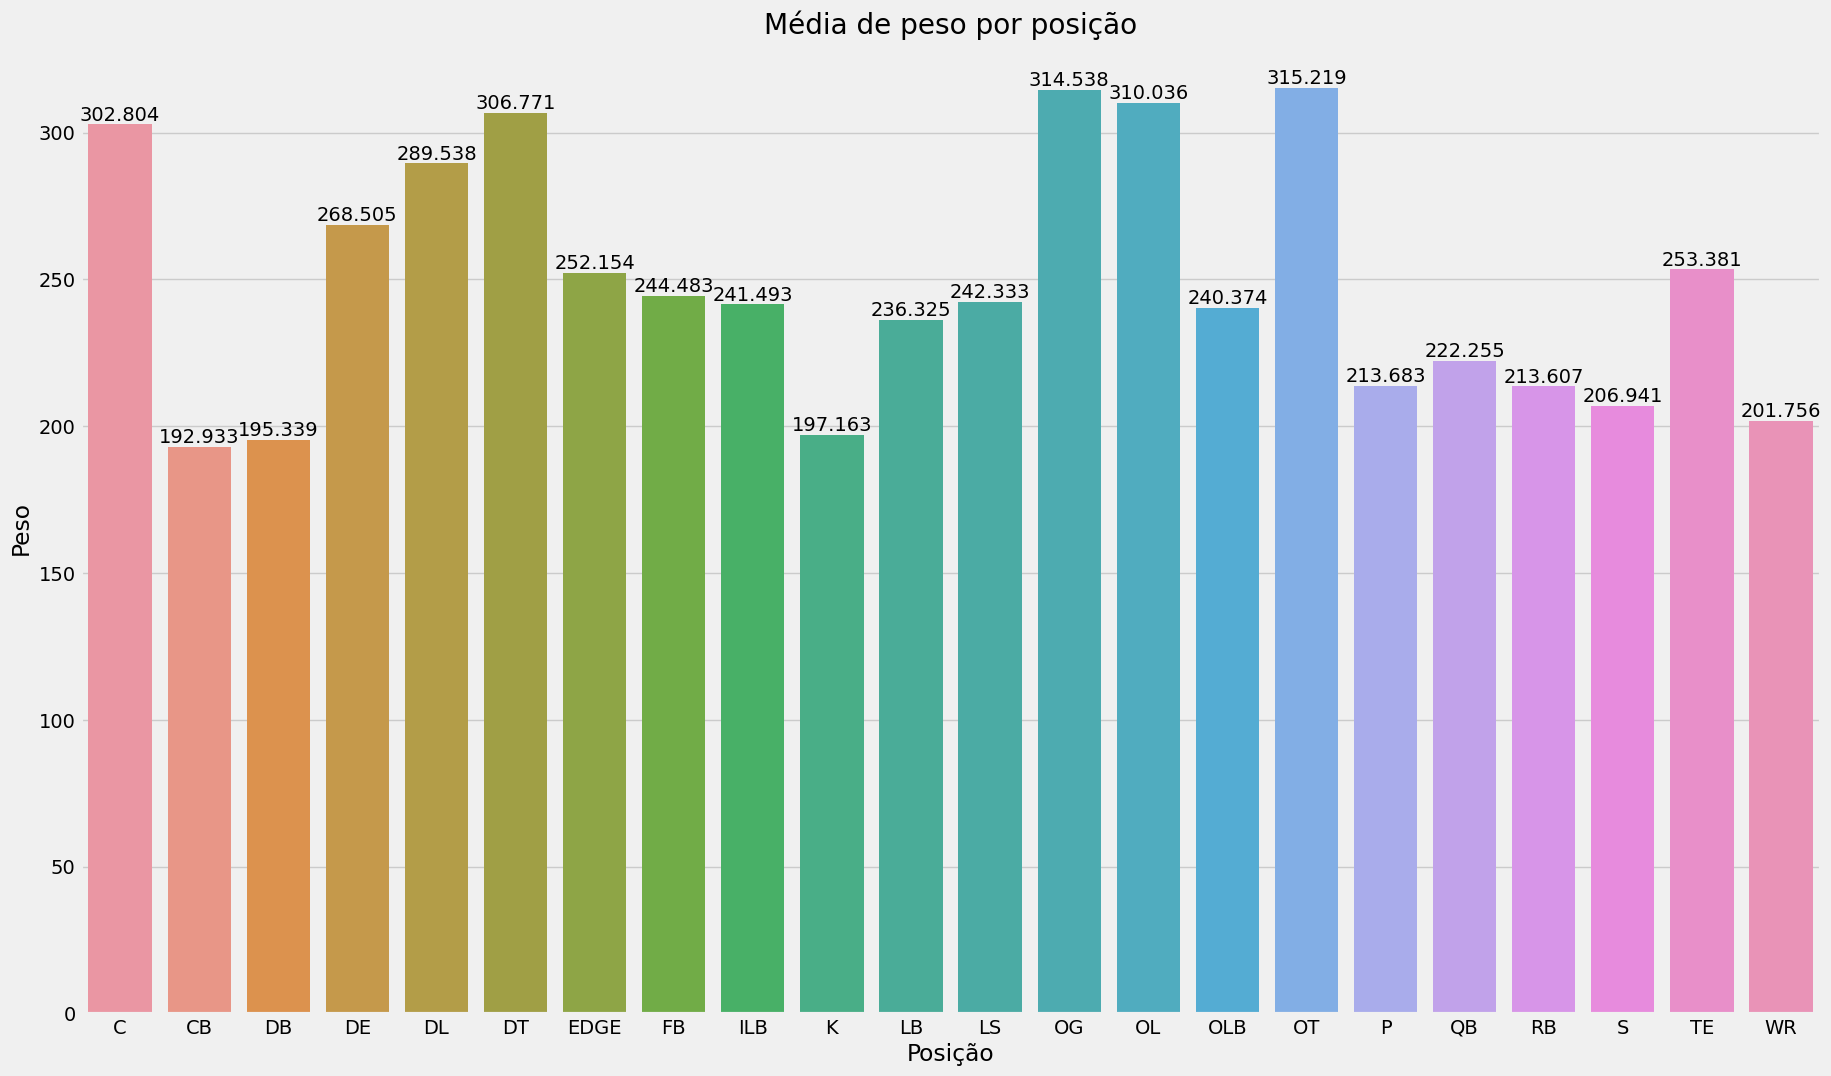

In [30]:
mean_weight_per_pos_df = df[df['Wt'] > 0]
mean_weight_per_pos_df = mean_weight_per_pos_df.groupby('Pos')[['Wt']].mean().reset_index()
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=mean_weight_per_pos_df, x='Pos', y='Wt', errwidth=0)
plt.title('Média de peso por posição')
plt.xlabel('Posição')
plt.ylabel('Peso')

for i in ax.containers:
    ax.bar_label(i,)

In [31]:
df3 = pd.DataFrame(df[['Pos', 'Ht', 'Wt']])
df3 = df3[df3['Ht'] > 0]
df3 = df3[df3['Wt'] > 0]
df3 = df3.groupby('Pos').mean().reset_index()
df3

,Pos,Ht,Wt
0,C,6.326630,302.804348
1,CB,5.623285,192.932983
2,DB,5.604576,195.338983
3,DE,6.375549,268.504817
4,DL,6.315517,289.413793
5,DT,6.290966,306.748491
6,EDGE,6.352308,252.153846
7,FB,5.840500,244.483333
8,ILB,6.081703,241.492754
9,K,5.849417,197.368932


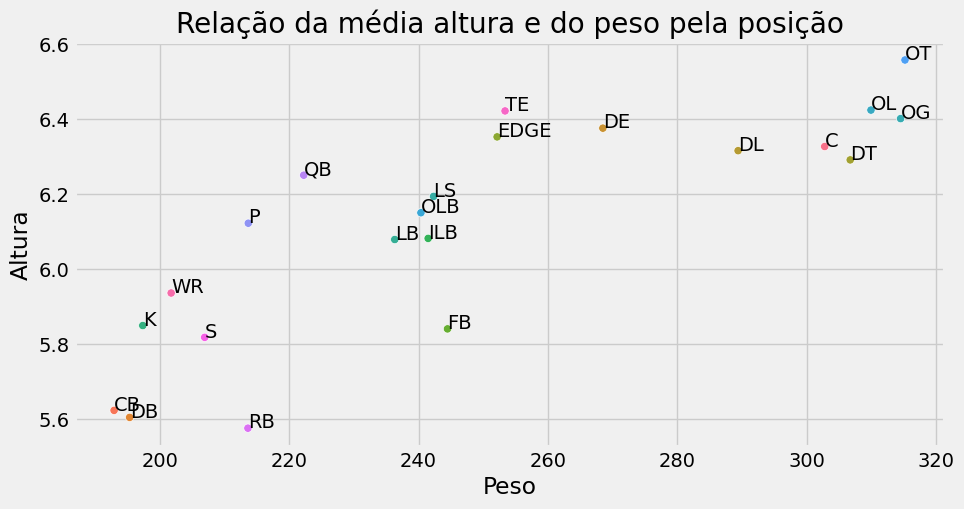

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df3, x='Wt', y='Ht', hue='Pos', legend=False)
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Relação da média altura e do peso pela posição')

for i, txt in enumerate(df3['Pos']):
    ax.text(df3['Wt'][i], df3['Ht'][i], txt)

In [33]:
df4 = pd.DataFrame(df[['Player', 'Pos', '40yd', '3Cone', 'draft_year']])
df4

,Player,Pos,40yd,3Cone,draft_year
0,John Abraham,OLB,4.55,0.00,2000.0
1,Shaun Alexander,RB,4.58,0.00,2000.0
2,Darnell Alford,OT,5.56,8.48,2000.0
3,Kyle Allamon,TE,4.97,7.29,2000.0
4,Rashard Anderson,CB,4.55,7.18,2000.0
...,...,...,...,...,...
7675,Devonte Wyatt,DT,4.77,0.00,2022.0
7676,Jalen Wydermyer,TE,0.00,0.00,2022.0
7677,Cade York,K,0.00,0.00,2022.0
7678,Nick Zakelj,OT,5.13,7.75,2022.0


In [34]:
df4 = df4[(df4['Pos'] == 'WR') & (df4['40yd'] > 0) & (df4['3Cone'] > 0) & (df4['draft_year'] > 2017)].reset_index()
df4

,index,Player,Pos,40yd,3Cone,draft_year
0,5897,Marcell Ateman,WR,4.62,7.07,2018.0
1,5924,Deon Cain,WR,4.43,6.71,2018.0
2,5927,Dylan Cantrell,WR,4.59,6.56,2018.0
3,5940,Simmie Cobbs,WR,4.64,6.70,2018.0
4,5945,Keke Coutee,WR,4.43,6.93,2018.0
...,...,...,...,...,...,...
137,7555,Jalen Nailor,WR,4.50,7.03,2022.0
138,7575,Alec Pierce,WR,4.41,7.13,2022.0
139,7606,Khalil Shakir,WR,4.43,7.28,2022.0
140,7635,Jalen Tolbert,WR,4.49,7.08,2022.0


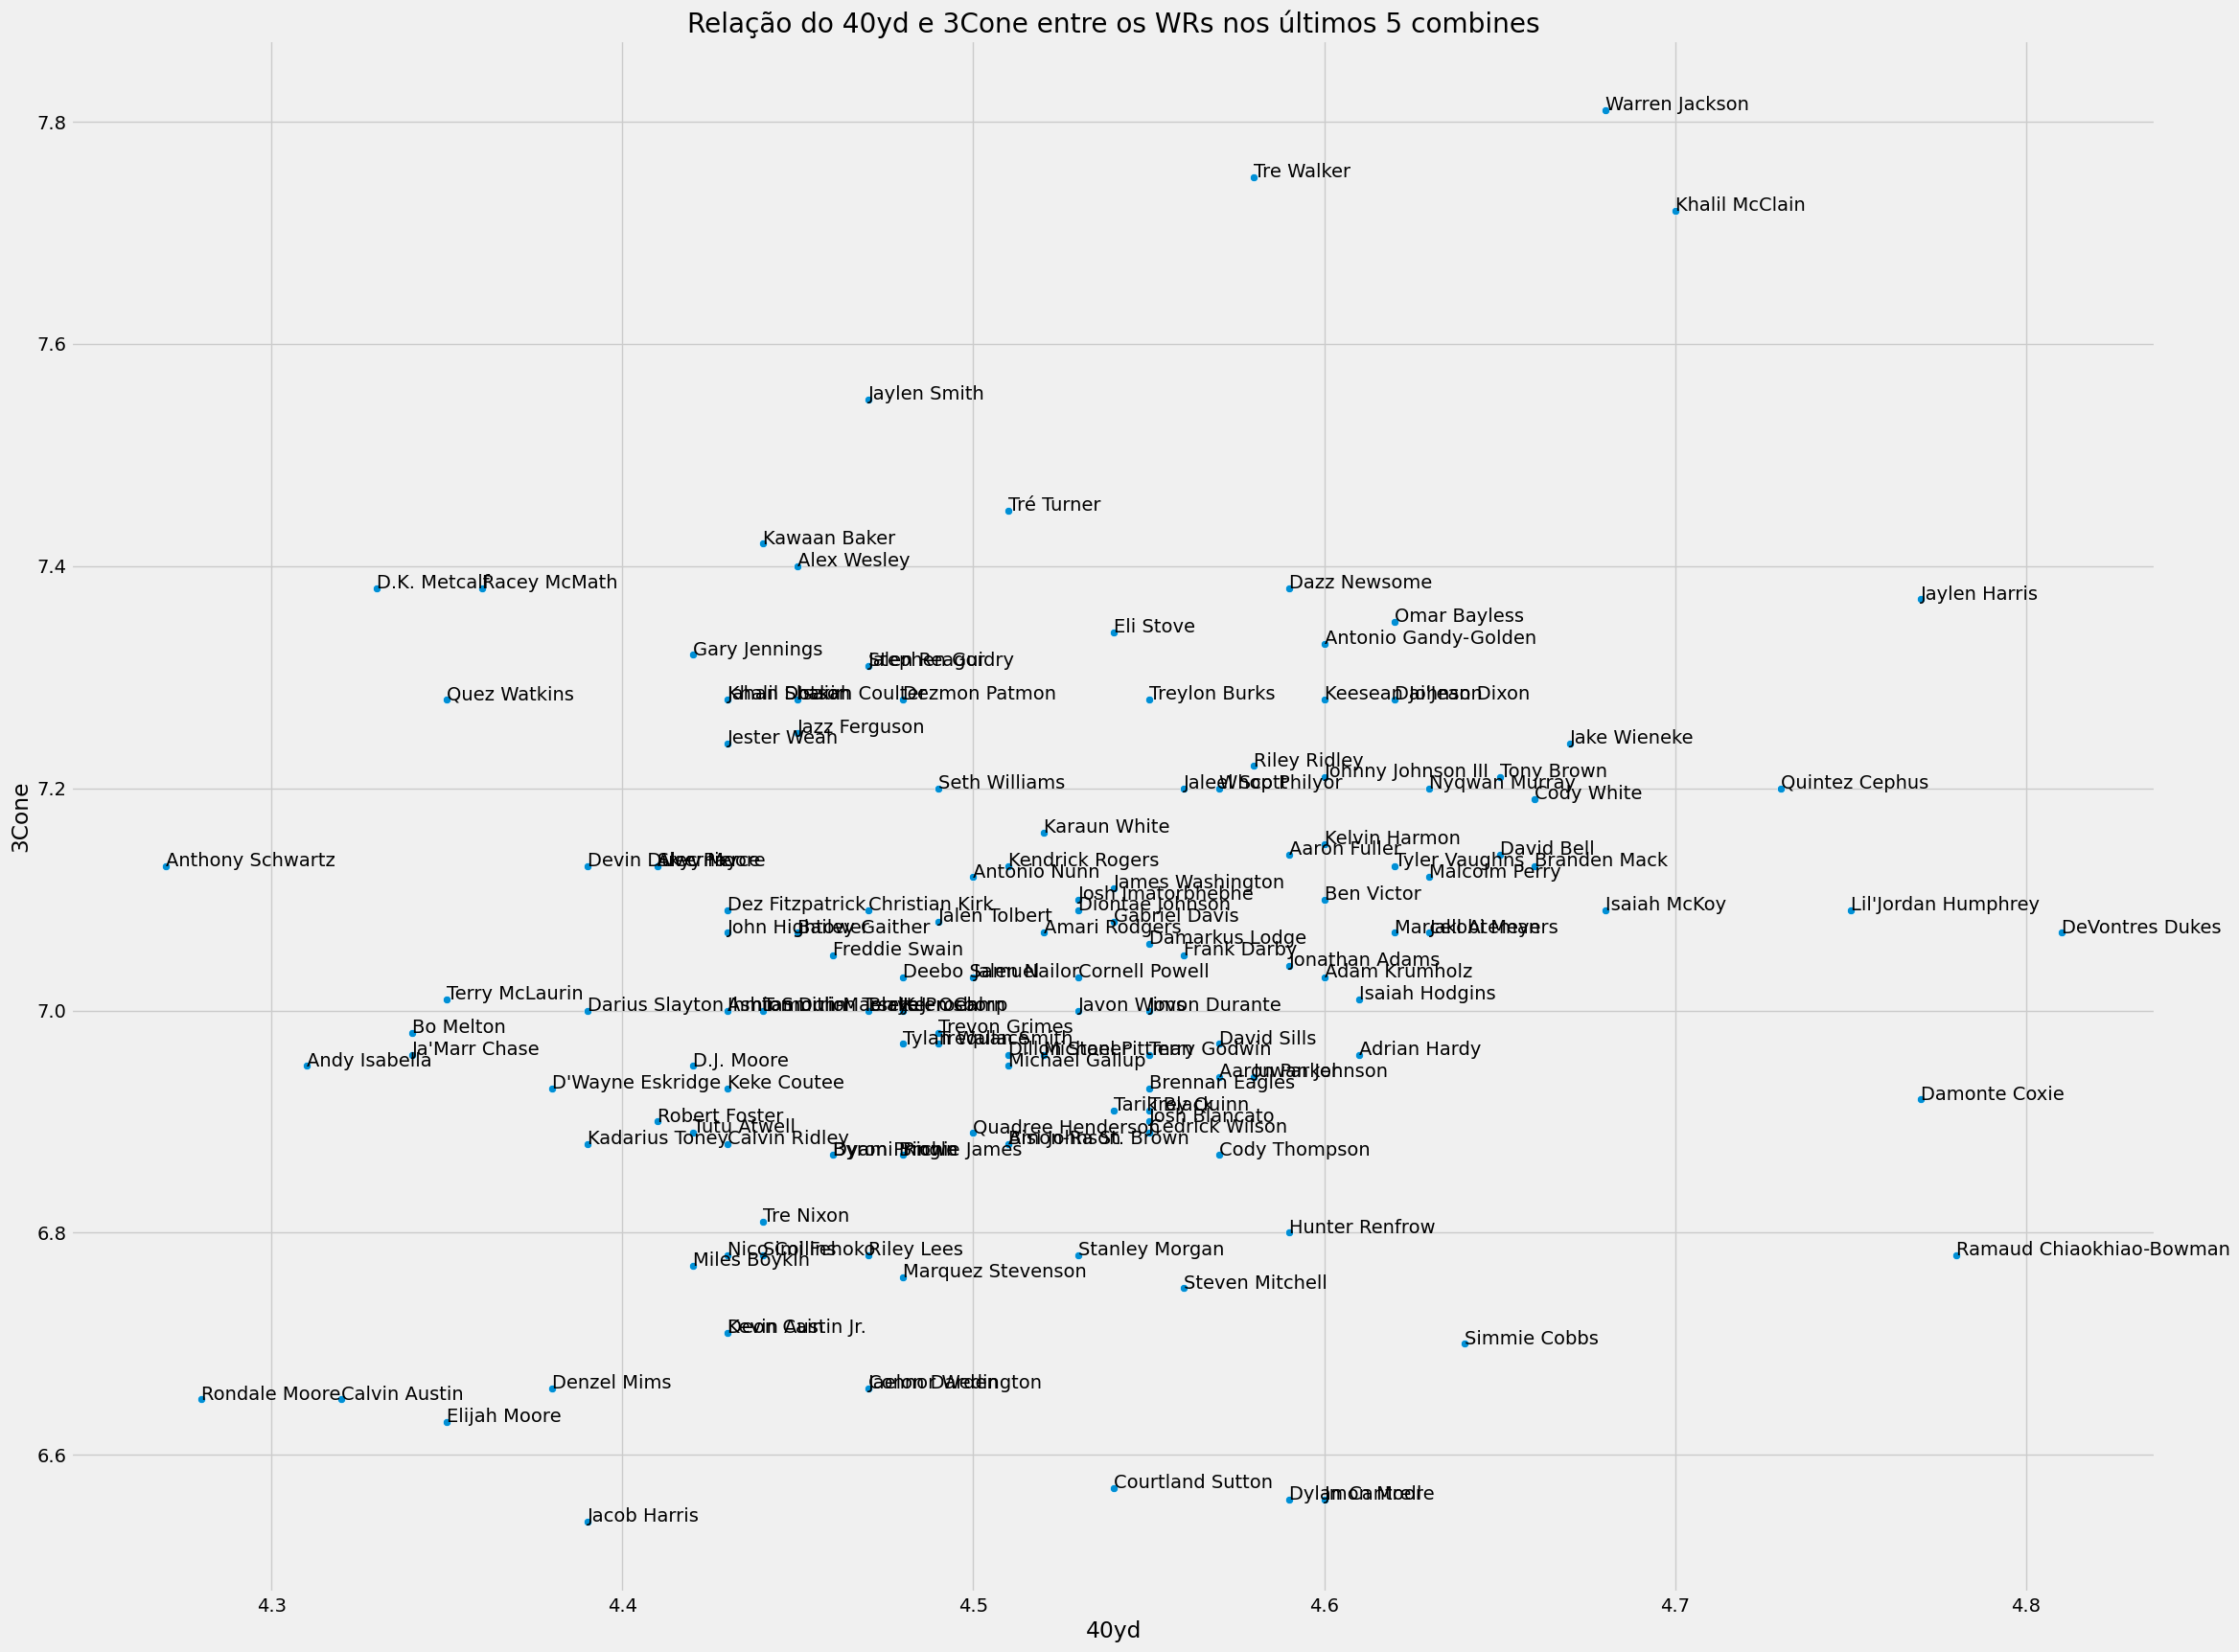

In [35]:
plt.figure(figsize=(25, 20))
ax = sns.scatterplot(data=df4, x='40yd', y='3Cone')
plt.xlabel('40yd')
plt.ylabel('3Cone')
plt.title('Relação do 40yd e 3Cone entre os WRs nos últimos 5 combines')

for i, txt in enumerate(df4['Player']):
    ax.text(df4['40yd'][i], df4['3Cone'][i], txt)

In [36]:
df5 = pd.DataFrame(df[['Player', 'Pos', '40yd', '3Cone', 'draft_year']])
df5

,Player,Pos,40yd,3Cone,draft_year
0,John Abraham,OLB,4.55,0.00,2000.0
1,Shaun Alexander,RB,4.58,0.00,2000.0
2,Darnell Alford,OT,5.56,8.48,2000.0
3,Kyle Allamon,TE,4.97,7.29,2000.0
4,Rashard Anderson,CB,4.55,7.18,2000.0
...,...,...,...,...,...
7675,Devonte Wyatt,DT,4.77,0.00,2022.0
7676,Jalen Wydermyer,TE,0.00,0.00,2022.0
7677,Cade York,K,0.00,0.00,2022.0
7678,Nick Zakelj,OT,5.13,7.75,2022.0


In [37]:
df5 = df5[(df5['Pos'] == 'RB') & (df5['40yd'] > 0) & (df5['3Cone'] > 0) & (df5['draft_year'] > 2017)].reset_index()
df5

,index,Player,Pos,40yd,3Cone,draft_year
0,5903,Kalen Ballage,RB,4.46,6.91,2018.0
1,5937,Nick Chubb,RB,4.52,7.09,2018.0
2,5964,Chase Edmonds,RB,4.55,6.79,2018.0
3,5969,Donnie Ernsberger,RB,4.78,7.09,2018.0
4,5981,Dimitri Flowers,RB,4.83,7.45,2018.0
...,...,...,...,...,...,...
67,7249,Trey Sermon,RB,4.57,6.83,2021.0
68,7273,Rhamondre Stevenson,RB,4.64,7.09,2021.0
69,7305,Israel Tucker,RB,4.60,7.25,2021.0
70,7341,Javonte Williams,RB,4.55,6.97,2021.0


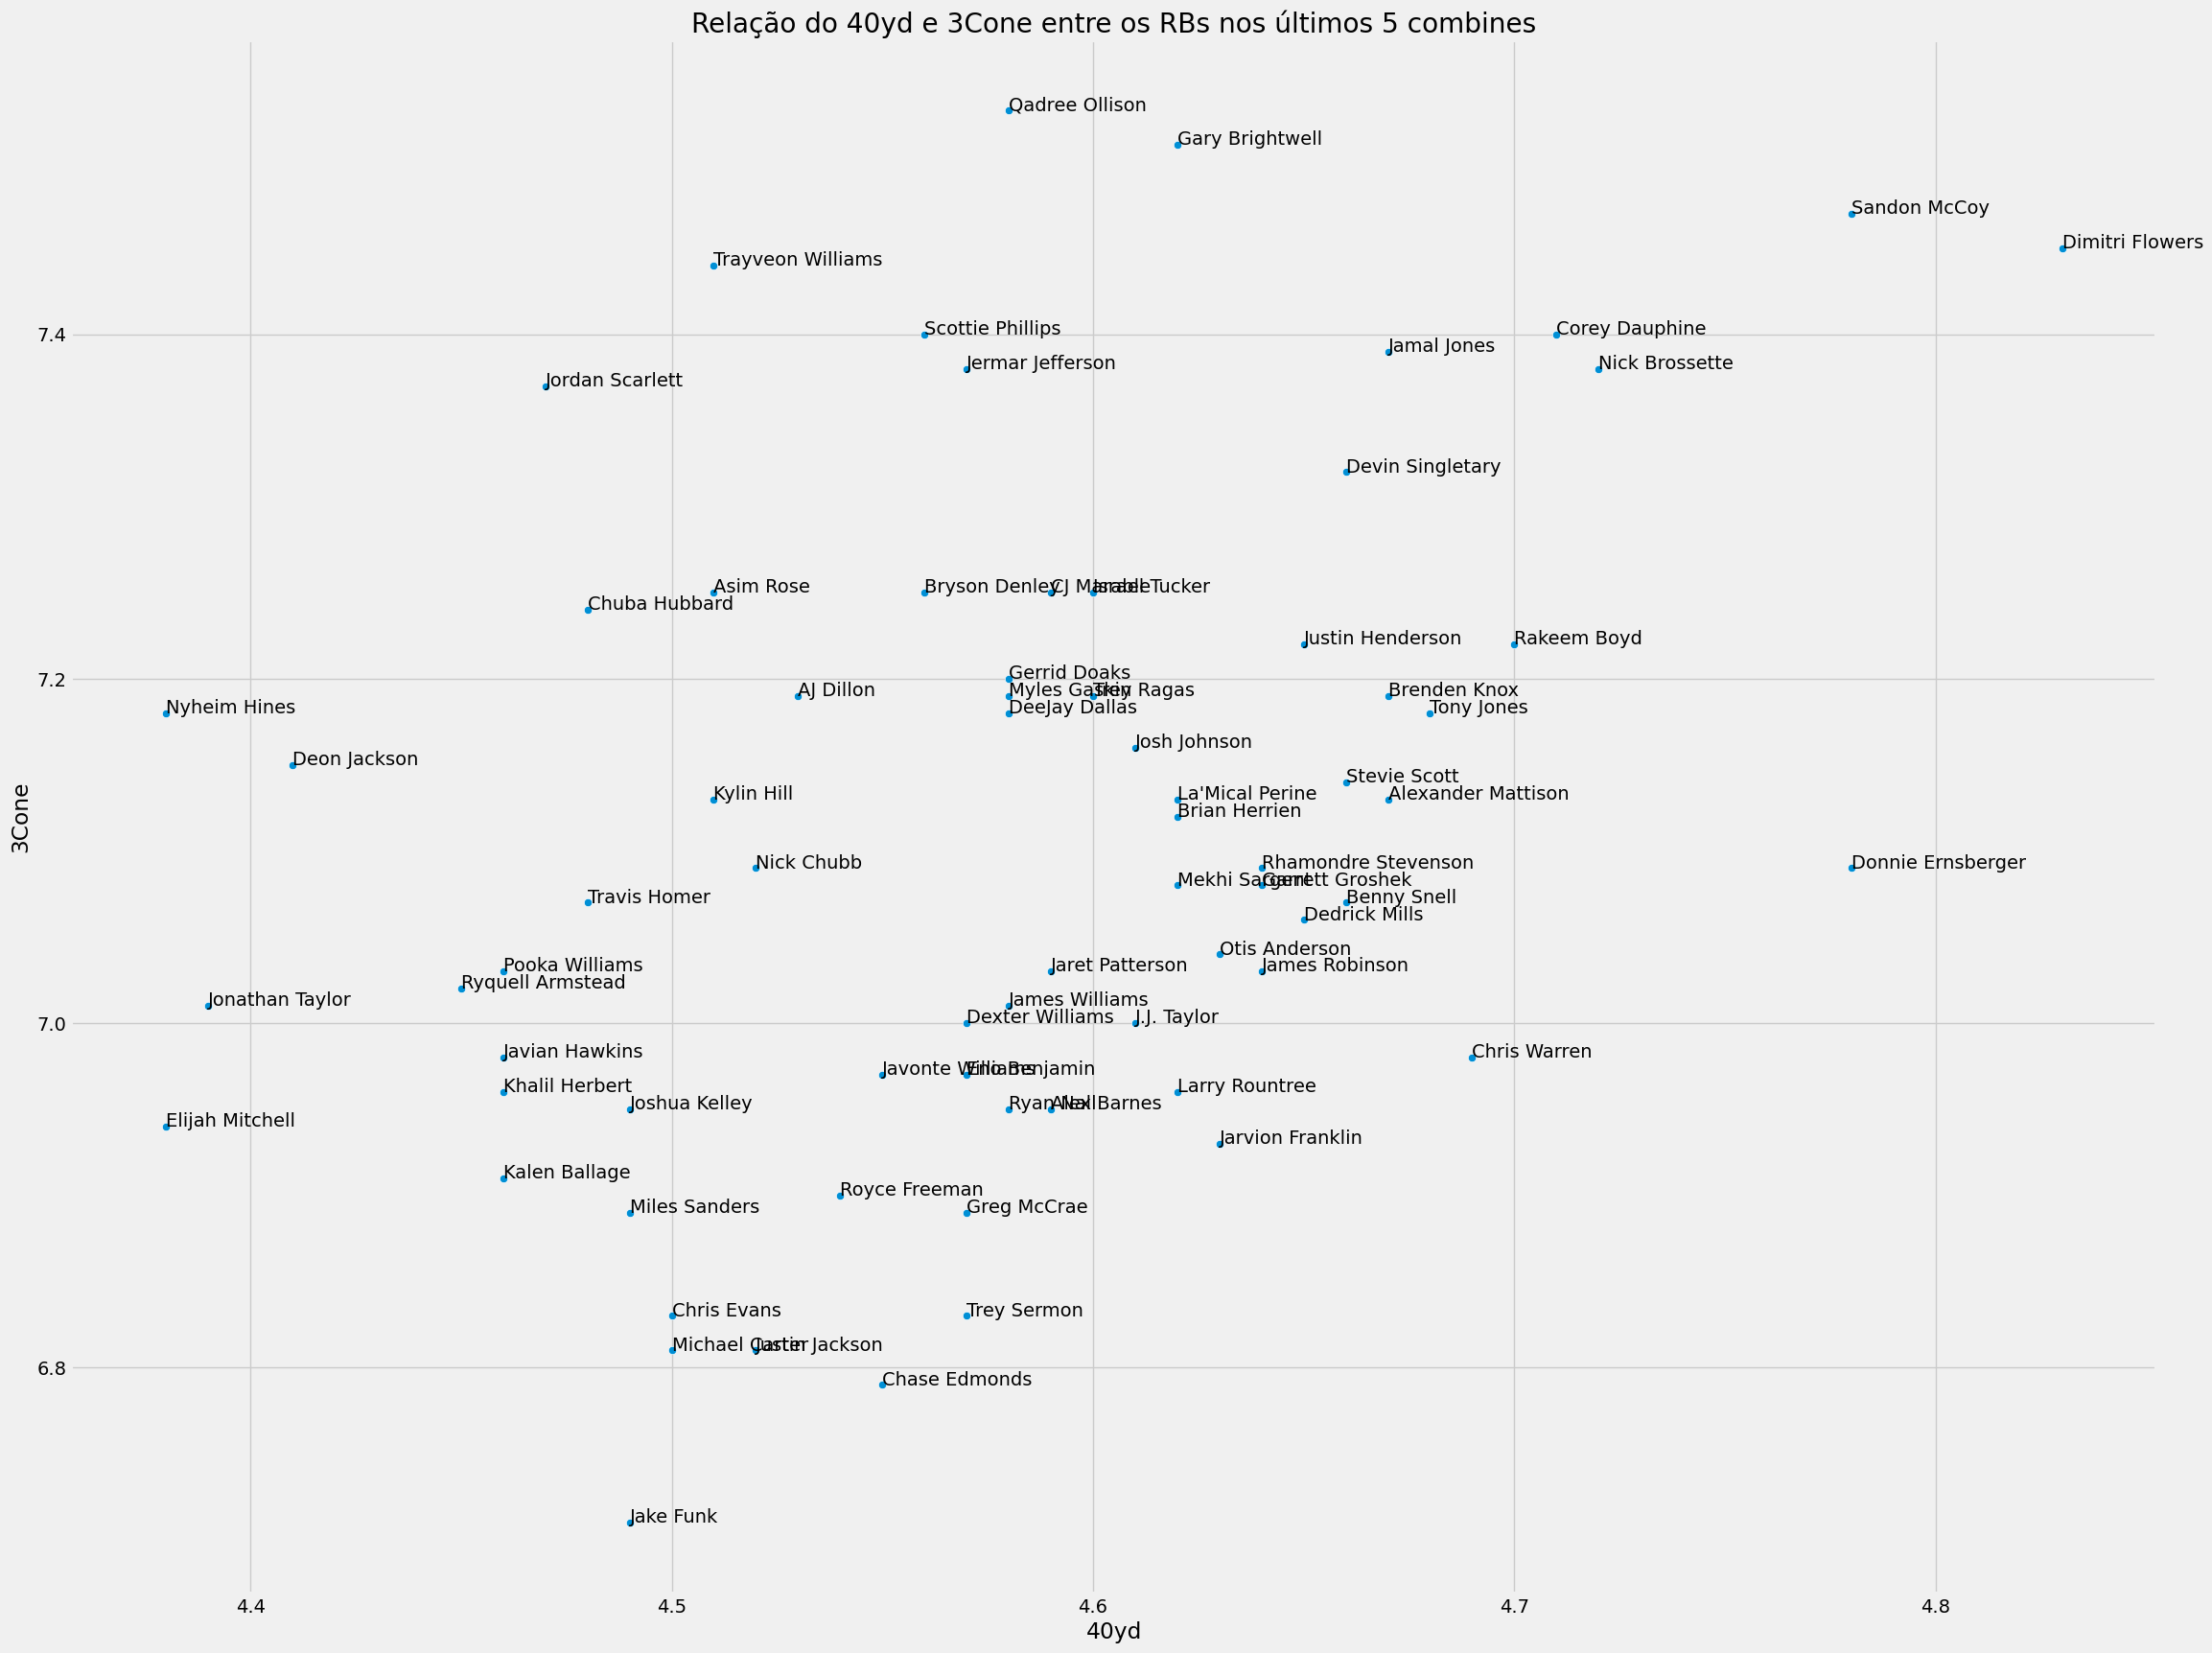

In [38]:
plt.figure(figsize=(25, 20))
ax = sns.scatterplot(data=df5, x='40yd', y='3Cone')
plt.xlabel('40yd')
plt.ylabel('3Cone')
plt.title('Relação do 40yd e 3Cone entre os RBs nos últimos 5 combines')

for i, txt in enumerate(df5['Player']):
    ax.text(df5['40yd'][i], df5['3Cone'][i], txt)

In [39]:
df6 = pd.DataFrame(df[['Pos', 'Bench', 'Wt']])
df6 = df6[df6['Bench'] > 0]
df6 = df6[df6['Wt'] > 0]
df6 = df6.groupby('Pos').mean().reset_index()
df6

,Pos,Bench,Wt
0,C,26.155405,302.939189
1,CB,14.496466,193.429329
2,DB,13.980392,195.509804
3,DE,23.778338,267.957179
4,DL,25.903226,289.870968
5,DT,27.551075,306.537634
6,EDGE,22.902439,252.048780
7,FB,23.020000,244.850000
8,ILB,22.365741,241.240741
9,K,15.200000,206.000000


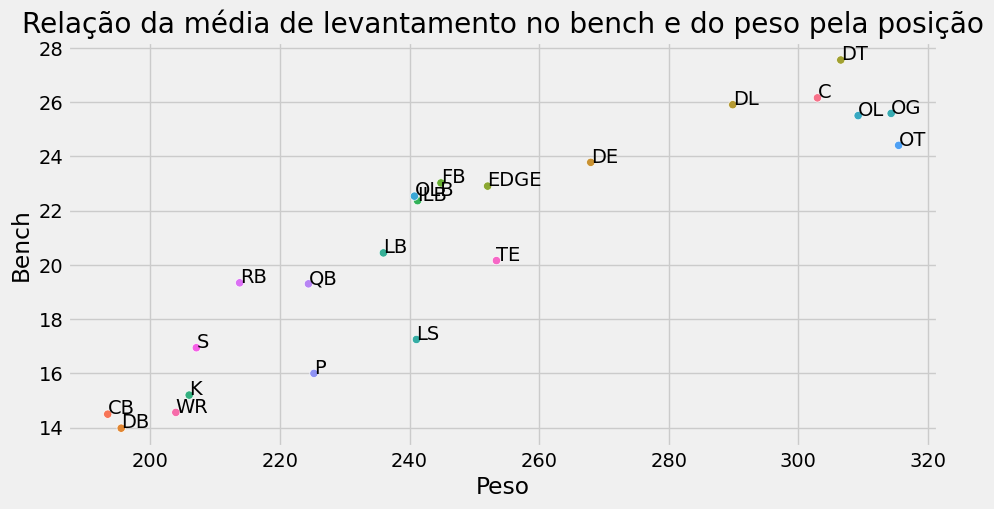

In [40]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df6, x='Wt', y='Bench', hue='Pos', legend=False)
plt.xlabel('Peso')
plt.ylabel('Bench')
plt.title('Relação da média de levantamento no bench e do peso pela posição')

for i, txt in enumerate(df6['Pos']):
    ax.text(df6['Wt'][i], df6['Bench'][i], txt)

In [41]:
df7 = pd.DataFrame(df[['Pos', '40yd', 'Ht']])
df7 = df7[df7['40yd'] > 0]
df7 = df7[df7['Ht'] > 0]
df7 = df7.groupby('Pos').mean().reset_index()
df7

,Pos,40yd,Ht
0,C,5.232971,6.324571
1,CB,4.492830,5.614422
2,DB,4.531636,5.599273
3,DE,4.829066,6.376163
4,DL,4.975784,6.309804
5,DT,5.097668,6.289307
6,EDGE,4.690200,6.352000
7,FB,4.765966,5.837479
8,ILB,4.753774,6.079434
9,K,4.910984,5.881148


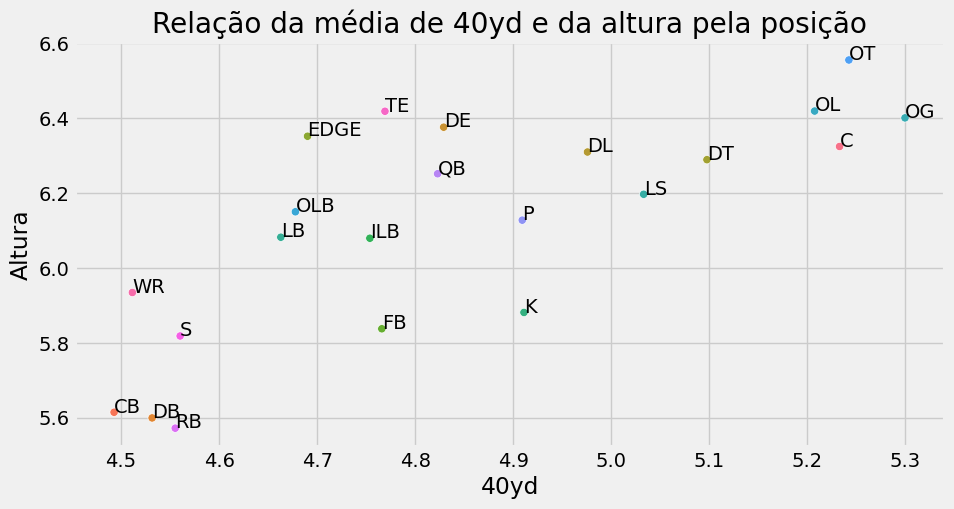

In [42]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df7, x='40yd', y='Ht', hue='Pos', legend=False)
plt.xlabel('40yd')
plt.ylabel('Altura')
plt.title('Relação da média de 40yd e da altura pela posição')

for i, txt in enumerate(df7['Pos']):
    ax.text(df7['40yd'][i], df7['Ht'][i], txt)